# Análisis del perfil turístico que visitó Gran Canaria 2022

![Portada](https://static.hosteltur.com/app/public/uploads/img/articles/2024/05/21/L_182819_3-nuevos-usos-de-ia-generativa-en-grupos-turisticos-el-caso-de-w2m.jpg)

***Introducción:***

El objetivo de este análisis es comprender las características demográficas, comportamientos, preferencias y patrones de los turistas en periodo de postpandemia, utilizando como base la encuesta de gasto turístico realizada por el Instituto Nacional de estadísticas (ISTAC)

Gran Canaria, como uno de los destinos turísticos más importantes de España, atrae a millones de turistas anualmente. Debido a la pandemia sufrida en 2020, el turismo se ha visto afectado considerablemente y con este análisis se busca identificar los cambios claves sufridos por dicho acontecimineto con la finalidad de plantearse estrategias de marketing y optimizar la experiencia del turismo ante posibles futuros factores adversos.

A lo largo del análisis se emplean técnicas de exploración de datos (EDA) y herramientas de visualización desarrolladas en Python.

# **1.Preparación de los datos**


**Imports**
Se importan las librerias, módulos y funciones que vamos a usar a lo largo del análisis.

In [504]:
#Librerias que vamos a usar a lo largo del EDA
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from scipy.stats import stats
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('utils')

import utils as funciones
import variables as vari

# **Carga de la base de datos y visualización inicial**

Cargamos el dataset con el que vamos a trabajar

In [505]:
#Llamamos al csv y creamos el df de perfil turistico
df_perfil_turistico = pd.read_csv("./data/Perfil_turístico.csv", sep=";", encoding="latin1")

In [506]:
#Observamos sus primeras columnas
df_perfil_turistico.head()

Sexo  Edad Nacionalidad Viaja_solo Viaja_pareja Viaja_hijo Viaja_amigos  \
0     6    42       España         No           No         No           No   
1     1    27       España         No           Si         No           No   
2     6    63       Italia         Si           No         No           No   
3     6    43  Reino Unido         No           No         Si           No   
4     1    43       España         No           No         No           Si   

  Viaja_otros  Noches  Tipo_alojamiento  ...  Visitas_totales_Islas  \
0          Si       5                 3  ...                      2   
1          No       4                 4  ...                     10   
2          No       6                 3  ...                      1   
3          No       6                 4  ...                      1   
4          No       4                 4  ...                      3   

   Visitas_total_GC  Calificacion  Repetiria  Nivel_educativo  \
0                 2             4         10                4   
1                 3             3         10                4   
2                 1             1          1                4   
3                 1             4          9                4   
4                 2             4         10                4   

   Situacion_laboral  Ingresos  Personas_hogar  Cuatrimestre   Año  
0                  1         1               1            Q1  2019  
1                  1         2               2            Q1  2019  
2                  2         1               1            Q1  2019  
3                  5         3               4            Q1  2019  
4                  1         2               1            Q1  2019  

[5 rows x 24 columns]

# **Limpieza de los datos**

Hacemos el tratamiento de limpieza de los datos que sea necesario para su posterior uso.

In [507]:
#Limpieza de variables categóticas
# Se sabe que en la variable sexo 1=Hombre y 6=Mujer por lo que vamos a hacer la transformacion
df_perfil_turistico["Sexo"] = df_perfil_turistico["Sexo"].replace({1: "Hombre", 6: "Mujer"})

In [508]:
#Nivel educativo
df_perfil_turistico["Nivel_educativo"] = df_perfil_turistico["Nivel_educativo"].replace({1:"Sin estudios", 2:"Estudios primarios", 3:"Estudios secundarios", 4:"Estudios superiores"})

In [509]:
#Situacion laboral
df_perfil_turistico["Situacion_laboral"] = df_perfil_turistico["Situacion_laboral"].replace({ 1:"Asalariado", 2:"Autonomo", 3:"Empresario_peque", 4:"Empresario_grande",
5:"Desempleado", 6:"Estudiante", 7:"Jubilado", 8:"Incapacitado", 9:"Militar", 10:"Dependients", 11:"Otros"})


In [510]:
#Ingresos
df_perfil_turistico["Ingresos"] = df_perfil_turistico["Ingresos"].replace({1:"Menos 25.000", 2:"25.000-49.999",3:"50.000-74.999", 4:"+75.000"})

In [511]:
#Tipo de alojamiento
df_perfil_turistico["Tipo_alojamiento"] = df_perfil_turistico["Tipo_alojamiento"].replace({1:"Hotel 1-2-3*", 2:"Hotel 4*",3:"Hotel 5*", 4:"Apartamento/Villa", 5:"Vivienda/airbnb", 6:"Alojamiento privado", 7:"Alojamiento rural"})

In [512]:
#Repetiría
df_perfil_turistico["Repetiria"] = df_perfil_turistico["Repetiria"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})

In [513]:
#Calificacion
df_perfil_turistico["Calificacion"] = df_perfil_turistico["Calificacion"].replace({1:"Mucho peor de lo esperado", 2:"Peor de lo esperado",3:"A la altura de las expectativas", 4:"Mejor de lo esperado", 5:"Mucho mejor de lo esperado"})

In [514]:
#Creamos una columna con el tipo de aconmpañante
columnas_tipo_acompañante = ["Viaja_solo", "Viaja_pareja", "Viaja_hijo", "Viaja_amigos", "Viaja_otros"]

# Crear la columna "Resultado" solo basándose en esas columnas
df_perfil_turistico["Modo_viaje"] = df_perfil_turistico.apply(lambda row: ', '.join(col for col in columnas_tipo_acompañante if row[col] == "Si"), axis=1)


In [515]:
#Eliminamos la columna Tipo de viaje
df_perfil_turistico = df_perfil_turistico.drop(columns=["Viaja_pareja","Viaja_hijo","Viaja_otros","Viaja_solo","Viaja_amigos"])

In [516]:
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     12295 non-null  object 
 1   Edad                     12295 non-null  int64  
 2   Nacionalidad             12295 non-null  object 
 3   Noches                   12295 non-null  int64  
 4   Tipo_alojamiento         12295 non-null  object 
 5   Coste_vuelos             12295 non-null  float64
 6   Coste_alojamiento        12295 non-null  float64
 7   Gastos                   12295 non-null  float64
 8   Horas_fuera_alojamiento  12295 non-null  int64  
 9   Visitas_totales_Islas    12295 non-null  int64  
 10  Visitas_total_GC         12295 non-null  int64  
 11  Calificacion             12295 non-null  object 
 12  Repetiria                12295 non-null  object 
 13  Nivel_educativo          12295 non-null  object 
 14  Situacion_laboral     

In [517]:
# Convertir algunas columnas a float
df_perfil_turistico['Edad'] = df_perfil_turistico['Edad'].astype(float)
# Verificar el cambio
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     12295 non-null  object 
 1   Edad                     12295 non-null  float64
 2   Nacionalidad             12295 non-null  object 
 3   Noches                   12295 non-null  int64  
 4   Tipo_alojamiento         12295 non-null  object 
 5   Coste_vuelos             12295 non-null  float64
 6   Coste_alojamiento        12295 non-null  float64
 7   Gastos                   12295 non-null  float64
 8   Horas_fuera_alojamiento  12295 non-null  int64  
 9   Visitas_totales_Islas    12295 non-null  int64  
 10  Visitas_total_GC         12295 non-null  int64  
 11  Calificacion             12295 non-null  object 
 12  Repetiria                12295 non-null  object 
 13  Nivel_educativo          12295 non-null  object 
 14  Situacion_laboral     

In [518]:
#¿Valores duplicados?
df_perfil_turistico.duplicated(keep=False)
len(df_perfil_turistico[df_perfil_turistico.duplicated(keep = False)]) # keep = "first", keep = False

0

In [519]:
#¿Valores nulos?
df_perfil_turistico.isnull()
df_perfil_turistico.isnull().sum()

Sexo                       0
Edad                       0
Nacionalidad               0
Noches                     0
Tipo_alojamiento           0
Coste_vuelos               0
Coste_alojamiento          0
Gastos                     0
Horas_fuera_alojamiento    0
Visitas_totales_Islas      0
Visitas_total_GC           0
Calificacion               0
Repetiria                  0
Nivel_educativo            0
Situacion_laboral          0
Ingresos                   0
Personas_hogar             0
Cuatrimestre               0
Año                        0
Modo_viaje                 0
dtype: int64

In [520]:
#¿Outliers?
variables_numericas=["Edad","Noches","Coste_vuelos","Coste_alojamiento","Gastos","Horas_fuera_alojamiento","Visitas_totales_Islas","Visitas_total_GC","Personas_hogar"]

In [521]:
# Calcular límites inferior y superior
outliers = {}
for var in variables_numericas:
    q1 = df_perfil_turistico[var].quantile(0.25)
    q3 = df_perfil_turistico[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identificar outliers
    outliers[var] = df_perfil_turistico[(df_perfil_turistico[var] < lower_bound) | (df_perfil_turistico[var] > upper_bound)]

    print(f"Outliers en {var}:\n{outliers[var]}")

Outliers en Edad:
       Sexo  Edad Nacionalidad  Noches     Tipo_alojamiento  Coste_vuelos  \
445  Hombre  89.0      Noruega      14  Alojamiento privado         706.0   

     Coste_alojamiento  Gastos  Horas_fuera_alojamiento  \
445              1.335   200.0                        8   

     Visitas_totales_Islas  Visitas_total_GC                     Calificacion  \
445                     10                 0  A la altura de las expectativas   

    Repetiria      Nivel_educativo Situacion_laboral       Ingresos  \
445       (8)  Estudios superiores          Jubilado  50.000-74.999   

     Personas_hogar Cuatrimestre   Año    Modo_viaje  
445               2           Q1  2019  Viaja_pareja  
Outliers en Noches:
         Sexo  Edad Nacionalidad  Noches     Tipo_alojamiento  Coste_vuelos  \
8       Mujer  21.0       España       2    Apartamento/Villa       100.000   
13     Hombre  64.0     Alemania      28             Hotel 4*       560.000   
23     Hombre  53.0        Otros   

Reemplazar outliers con la mediana ya que mantiene la tendencia central del conjunto de datos si que los valores extremos sesgen los resultados


In [522]:
# Reemplazar valores fuera del rango por la mediana
for var in variables_numericas:
    q1 = df_perfil_turistico[var].quantile(0.25)
    q3 = df_perfil_turistico[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    median = df_perfil_turistico[var].median()
    df_perfil_turistico[var] = df_perfil_turistico[var].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

In [523]:
#Vemos el total de columnas
df_perfil_turistico.columns

Index(['Sexo', 'Edad', 'Nacionalidad', 'Noches', 'Tipo_alojamiento',
       'Coste_vuelos', 'Coste_alojamiento', 'Gastos',
       'Horas_fuera_alojamiento', 'Visitas_totales_Islas', 'Visitas_total_GC',
       'Calificacion', 'Repetiria', 'Nivel_educativo', 'Situacion_laboral',
       'Ingresos', 'Personas_hogar', 'Cuatrimestre', 'Año', 'Modo_viaje'],
      dtype='object')

In [524]:
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     12295 non-null  object 
 1   Edad                     12295 non-null  float64
 2   Nacionalidad             12295 non-null  object 
 3   Noches                   12295 non-null  float64
 4   Tipo_alojamiento         12295 non-null  object 
 5   Coste_vuelos             12295 non-null  float64
 6   Coste_alojamiento        12295 non-null  float64
 7   Gastos                   12295 non-null  float64
 8   Horas_fuera_alojamiento  12295 non-null  float64
 9   Visitas_totales_Islas    12295 non-null  float64
 10  Visitas_total_GC         12295 non-null  float64
 11  Calificacion             12295 non-null  object 
 12  Repetiria                12295 non-null  object 
 13  Nivel_educativo          12295 non-null  object 
 14  Situacion_laboral     

Ya tenemos los datos limpios y listos para porder empezar con su análisis.

Empecemos con la tipología de las variables definiendo su cardinalidad para su posterior clasificación.

In [525]:
# Calculemos ahora su cardinalidad
cardinalidad = round((df_perfil_turistico.nunique() /len (df_perfil_turistico))*100,2)
cardinalidad


Sexo                        0.02
Edad                        0.58
Nacionalidad                0.11
Noches                      0.10
Tipo_alojamiento            0.06
Coste_vuelos               18.28
Coste_alojamiento          24.14
Gastos                     16.03
Horas_fuera_alojamiento     0.16
Visitas_totales_Islas       0.14
Visitas_total_GC            0.10
Calificacion                0.04
Repetiria                   0.09
Nivel_educativo             0.03
Situacion_laboral           0.09
Ingresos                    0.03
Personas_hogar              0.03
Cuatrimestre                0.03
Año                         0.02
Modo_viaje                  0.04
dtype: float64

In [526]:
# Calculemos ahora su cardinalidad
def cardi(df_in,umbral_categoria, umbral_continua):
    df_cardi= df_cardi = pd.DataFrame({
    "Cardi": df_in.nunique(),
    "% Cardi": df_in.nunique() / len(df_in) * 100
})
    clasificacion= []
    for index, valor in df_cardi["Cardi"].items():
        if valor==2:
            clasificacion.append("Binaria")
        elif valor < umbral_categoria:
            clasificacion.append("Categorica")
        elif valor >= umbral_categoria:
            if df_cardi.loc[index, "% Cardi"] >= umbral_continua:
                clasificacion.append("Numerica Continua")
            else:
                clasificacion.append("Numerica Discreta")
    df_cardi["Clasificacion"]=clasificacion
    return df_cardi

In [527]:
cardi(df_perfil_turistico,15,65)

Cardi    % Cardi      Clasificacion
Sexo                         2   0.016267            Binaria
Edad                        71   0.577471  Numerica Discreta
Nacionalidad                14   0.113867         Categorica
Noches                      12   0.097601         Categorica
Tipo_alojamiento             7   0.056934         Categorica
Coste_vuelos              2248  18.283855  Numerica Discreta
Coste_alojamiento         2968  24.139894  Numerica Discreta
Gastos                    1971  16.030907  Numerica Discreta
Horas_fuera_alojamiento     20   0.162668  Numerica Discreta
Visitas_totales_Islas       17   0.138268  Numerica Discreta
Visitas_total_GC            12   0.097601         Categorica
Calificacion                 5   0.040667         Categorica
Repetiria                   11   0.089467         Categorica
Nivel_educativo              4   0.032534         Categorica
Situacion_laboral           11   0.089467         Categorica
Ingresos                     4   0.032534         Categorica
Personas_hogar               4   0.032534         Categorica
Cuatrimestre                 4   0.032534         Categorica
Año                          2   0.016267            Binaria
Modo_viaje                   5   0.040667         Categorica

# **2. Análisis**

Una vez determinada la cardinalidad, podemos comprender mejor las variables y definirlas en la siguiente tabla. Esta tabla nos servirá como guía para identificar cada variable y aplicar el análisis adecuado a cada una de ellas.

|Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Sexo| Sexo del entrevistado: 1 si es Hombre o 6 si es mujer|Binaria|1|Explica análisis demográfico|
|Edad| Edad del encuestado|Numérica Discreta|1|Explica análisis demográfico|
|Nacionalidad|Nacionalidad del turista|Categórica|1|Explica análisis demográfico|
|Noches|Número de noches que pernoctó en la isla|Númerica Discreta|1|Define el comportamiento del gasto|
|Tipo_alojamiento| Tipo de alojamiento que se hospedó|Categórica|1|Define el comportamiento del gasto|
|Coste_vuelos|Coste en euros del billete de avión|Numérica Discreta|1|Define el comportamiento del gasto|
|Coste_alojamiento|Coste en euros de las noches alojadas|Numérica Discreta|1|Define el comportamiento del gasto|
|Gasto| Gasto del turista en su estancia en la isla|Numérica Discreta|1|Define el comportamiento del gasto|
|Visitas_totales_Islas| Número de veces que ha visitados las Islas Canarias|Numérica Discreta|2|Nos aporta información sobre el comportamiento del turista|
|Visitas_total_GC| Número de veces que ha estado en Gran Canaria|Numérica Discreta|2|Nos aporta información sobre el comportamiento del turista|
|Calificacion| Calificación del 1-10 de su viaje|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Repetiria| Del 1-10 el valor de repetición|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Nivel_educativo| Nivel educativo|Categórica|1|Explica análisis demográfico|
|Situacion_laboral| Situación laboral|Categórica|1|Explica análisis demográfico|
|Ingresos| Ingresos por tramos, del turista|Categórica|1|Explica análisis demográfico|
|Personas_hogar| Número de personas del hogar |Numérica Discreta|1|Explica análisis demográfico|
|Cuatrimestre| Cuatrimestre de estudio|Categórica|1|Temporadas del estudio|
|Horas_fuera_alojamiento| Horas fuera del alojamiento|Numérica discreta|3|Comportamiento durante la estancia|
|Año| 2019 -2022|Binaria|1|Define los datos antes y después de pandemia|
|Modo viaje| Tipo de acompañante|Categórica|1|Define el comportamiento del gasto|

# **2.1Análisis Univariante**

# *Variables Categóricas*

Análisis univariante de las variables categóricas, para este análisis, vamos a dividir la muestra en dos, es decir, un df para el 2019 y otro para el 2022 para tener definido las variables antes y después de pandemia.

In [528]:
#Datos prepandemia
df_2019 = df_perfil_turistico[df_perfil_turistico['Año'] == 2019]
#Datos postpandemia
df_2022 = df_perfil_turistico[df_perfil_turistico['Año'] == 2022]

In [529]:
#Variables categóricas 
variables_categoricas=["Sexo","Nacionalidad","Tipo_alojamiento","Calificacion","Repetiria","Nivel_educativo","Situacion_laboral","Ingresos", "Modo_viaje"]

In [530]:
#Perfil del turista 2019
df_2019[variables_categoricas].mode().T

0
Sexo                                         Mujer
Nacionalidad                              Alemania
Tipo_alojamiento                          Hotel 4*
Calificacion       A la altura de las expectativas
Repetiria                                     (10)
Nivel_educativo                Estudios superiores
Situacion_laboral                       Asalariado
Ingresos                             25.000-49.999
Modo_viaje                            Viaja_pareja

In [531]:
#Perfil del turista 2022
df_2022[variables_categoricas].mode().T

0
Sexo                                         Mujer
Nacionalidad                                España
Tipo_alojamiento                          Hotel 4*
Calificacion       A la altura de las expectativas
Repetiria                                     (10)
Nivel_educativo                Estudios superiores
Situacion_laboral                       Asalariado
Ingresos                             25.000-49.999
Modo_viaje                            Viaja_pareja

***Antes de pandemia:***
La moda revela que el perfil predominante del turista es el de una mujer procedente de Alemania. Este turista se aloja en hoteles de cuatro estrellas, disfruta de su estancia, alcanzando sus expectativas, y, sin duda recomendaría el destino. Su perfil suele incluir estudios superiores y un nivel de ingresos de entre 25.000 y 50.000 euros. Generalmente, viaja en pareja, habiendo visitado las islas previamente.

***Post pandemia:***
El perfil se mantiene igual, solo cambia que la procedencia sea más común desde España. 

Este análisis preliminar concluye que se ha producido un cambio en el comportamiento respecto a la nacionalidad de origen del turista, mientras que el resto de las características del perfil se mantienen sin variaciones. Este fenómeno puede explicarse por las restricciones aplicadas en los distintos países, que, junto con la proximidad geográfica, hicieron que para el turista español fuera más sencillo viajar a la isla en comparación con turistas de otras nacionalidades.

***Análisis de frecuencias absolutas y relativas***

Para este estudio, debido a la cantidad de variables, es mejor verlo de manera gráfica

# **Gráficos variables categóricas**

**2019**

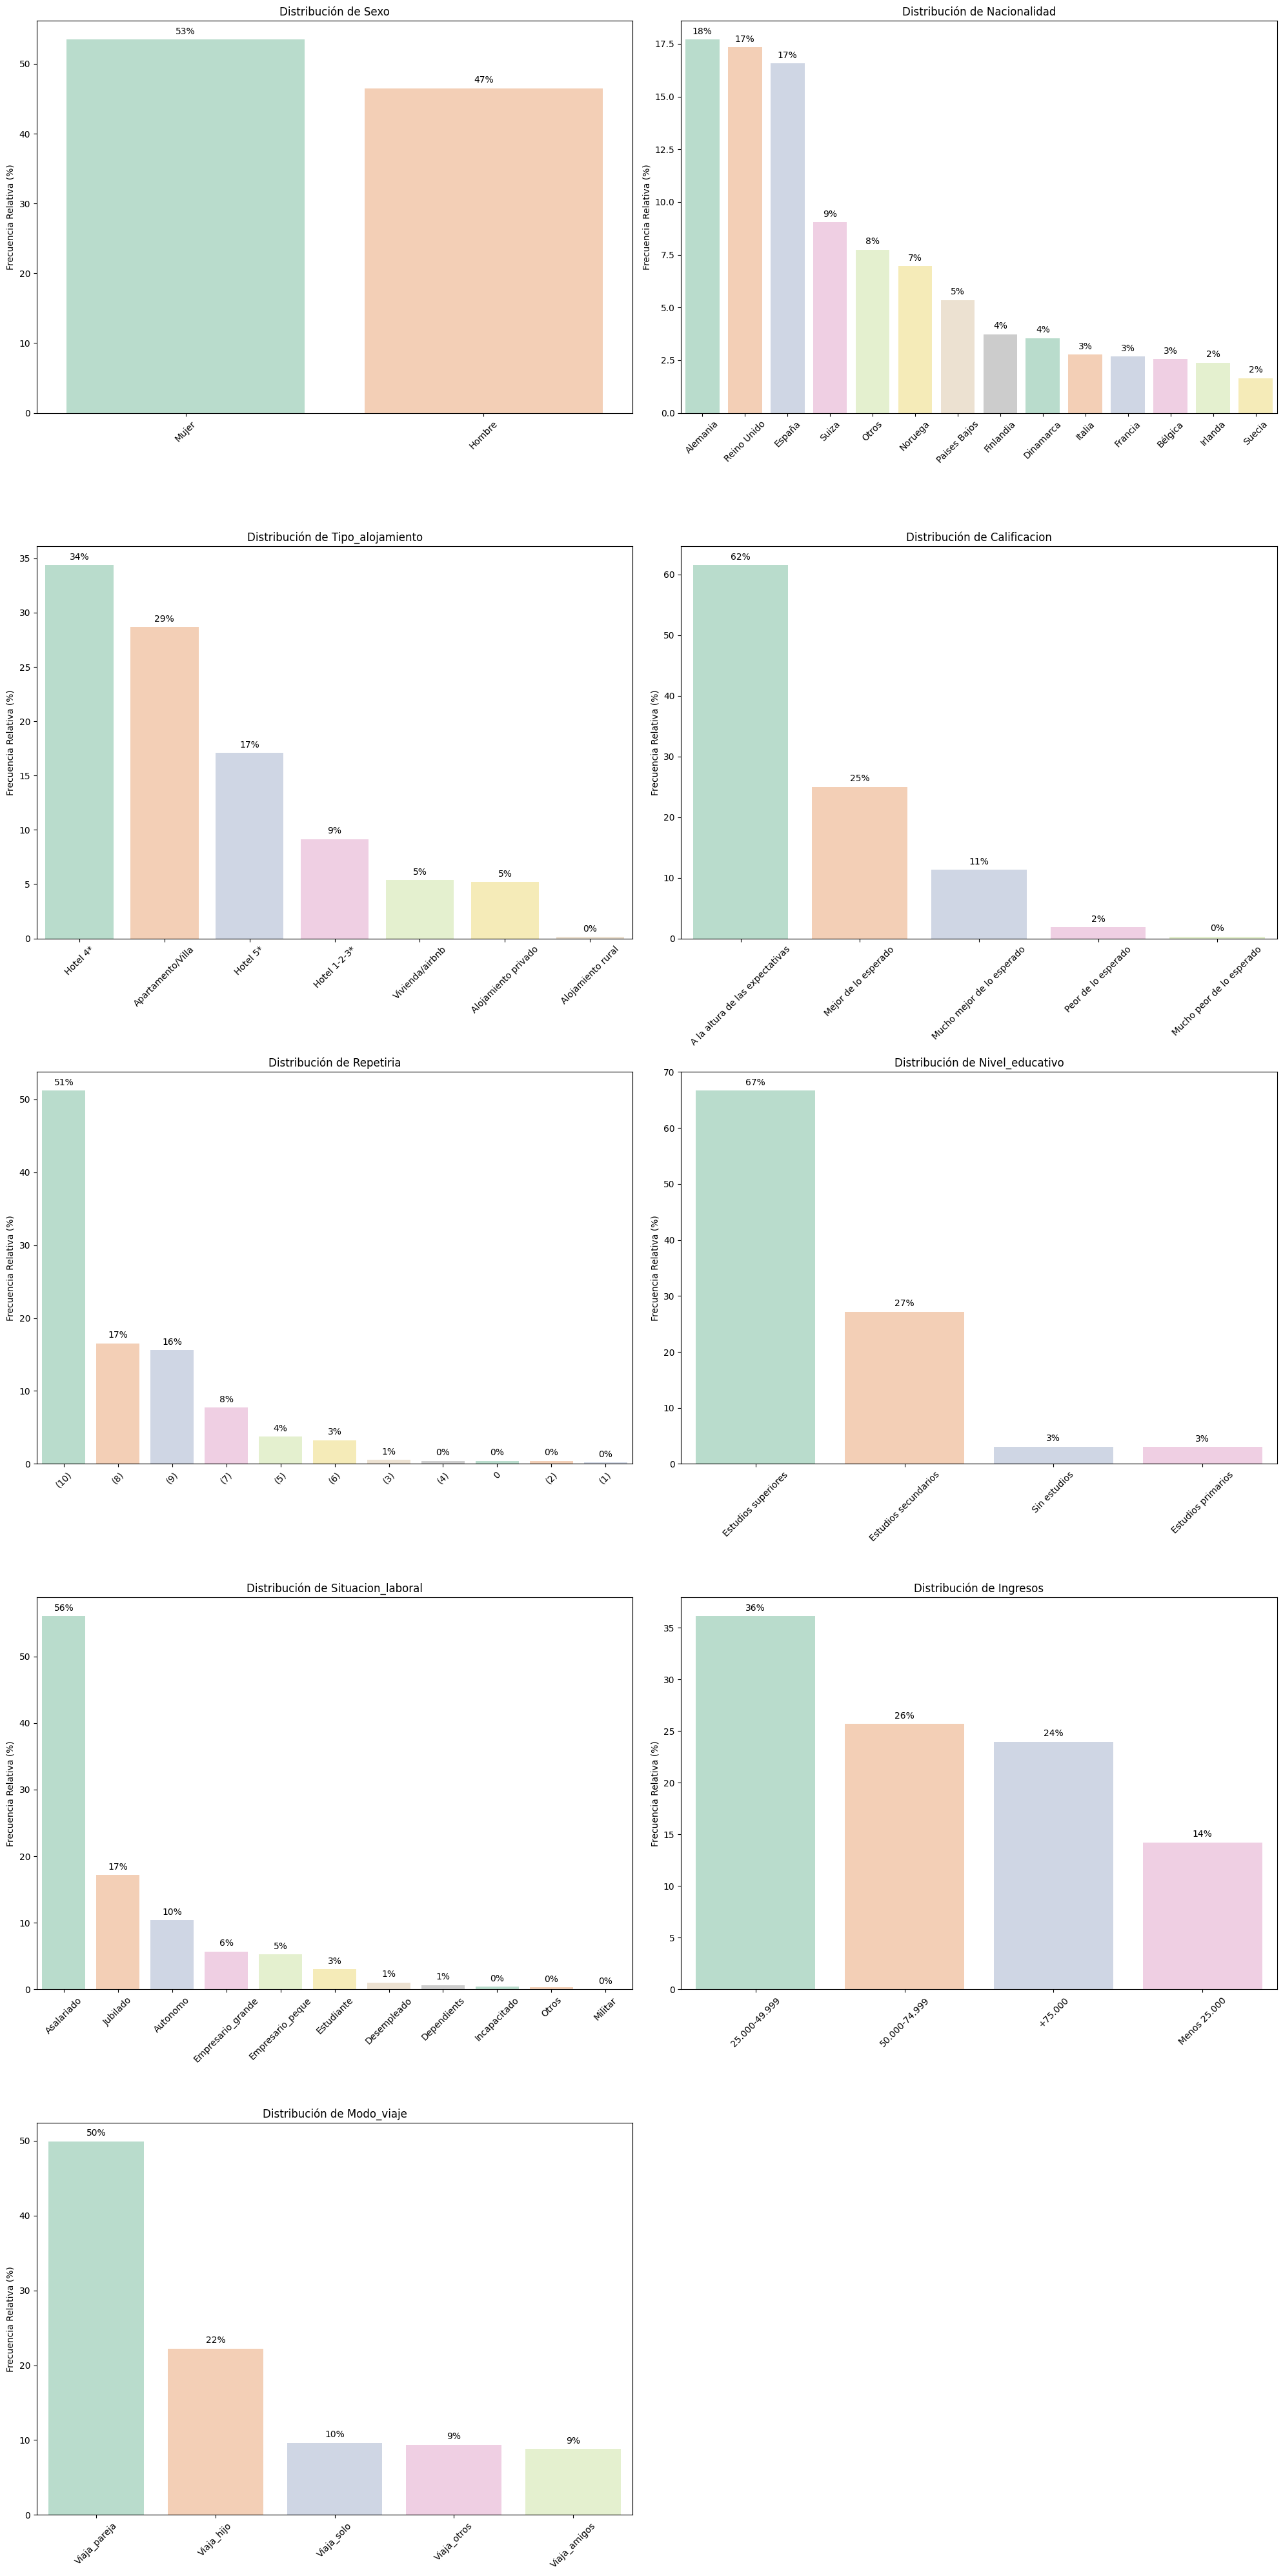

In [532]:
funciones.pinta_distribucion_categoricas(df_2019,variables_categoricas,relativa=True,mostrar_valores=True)

**2022**


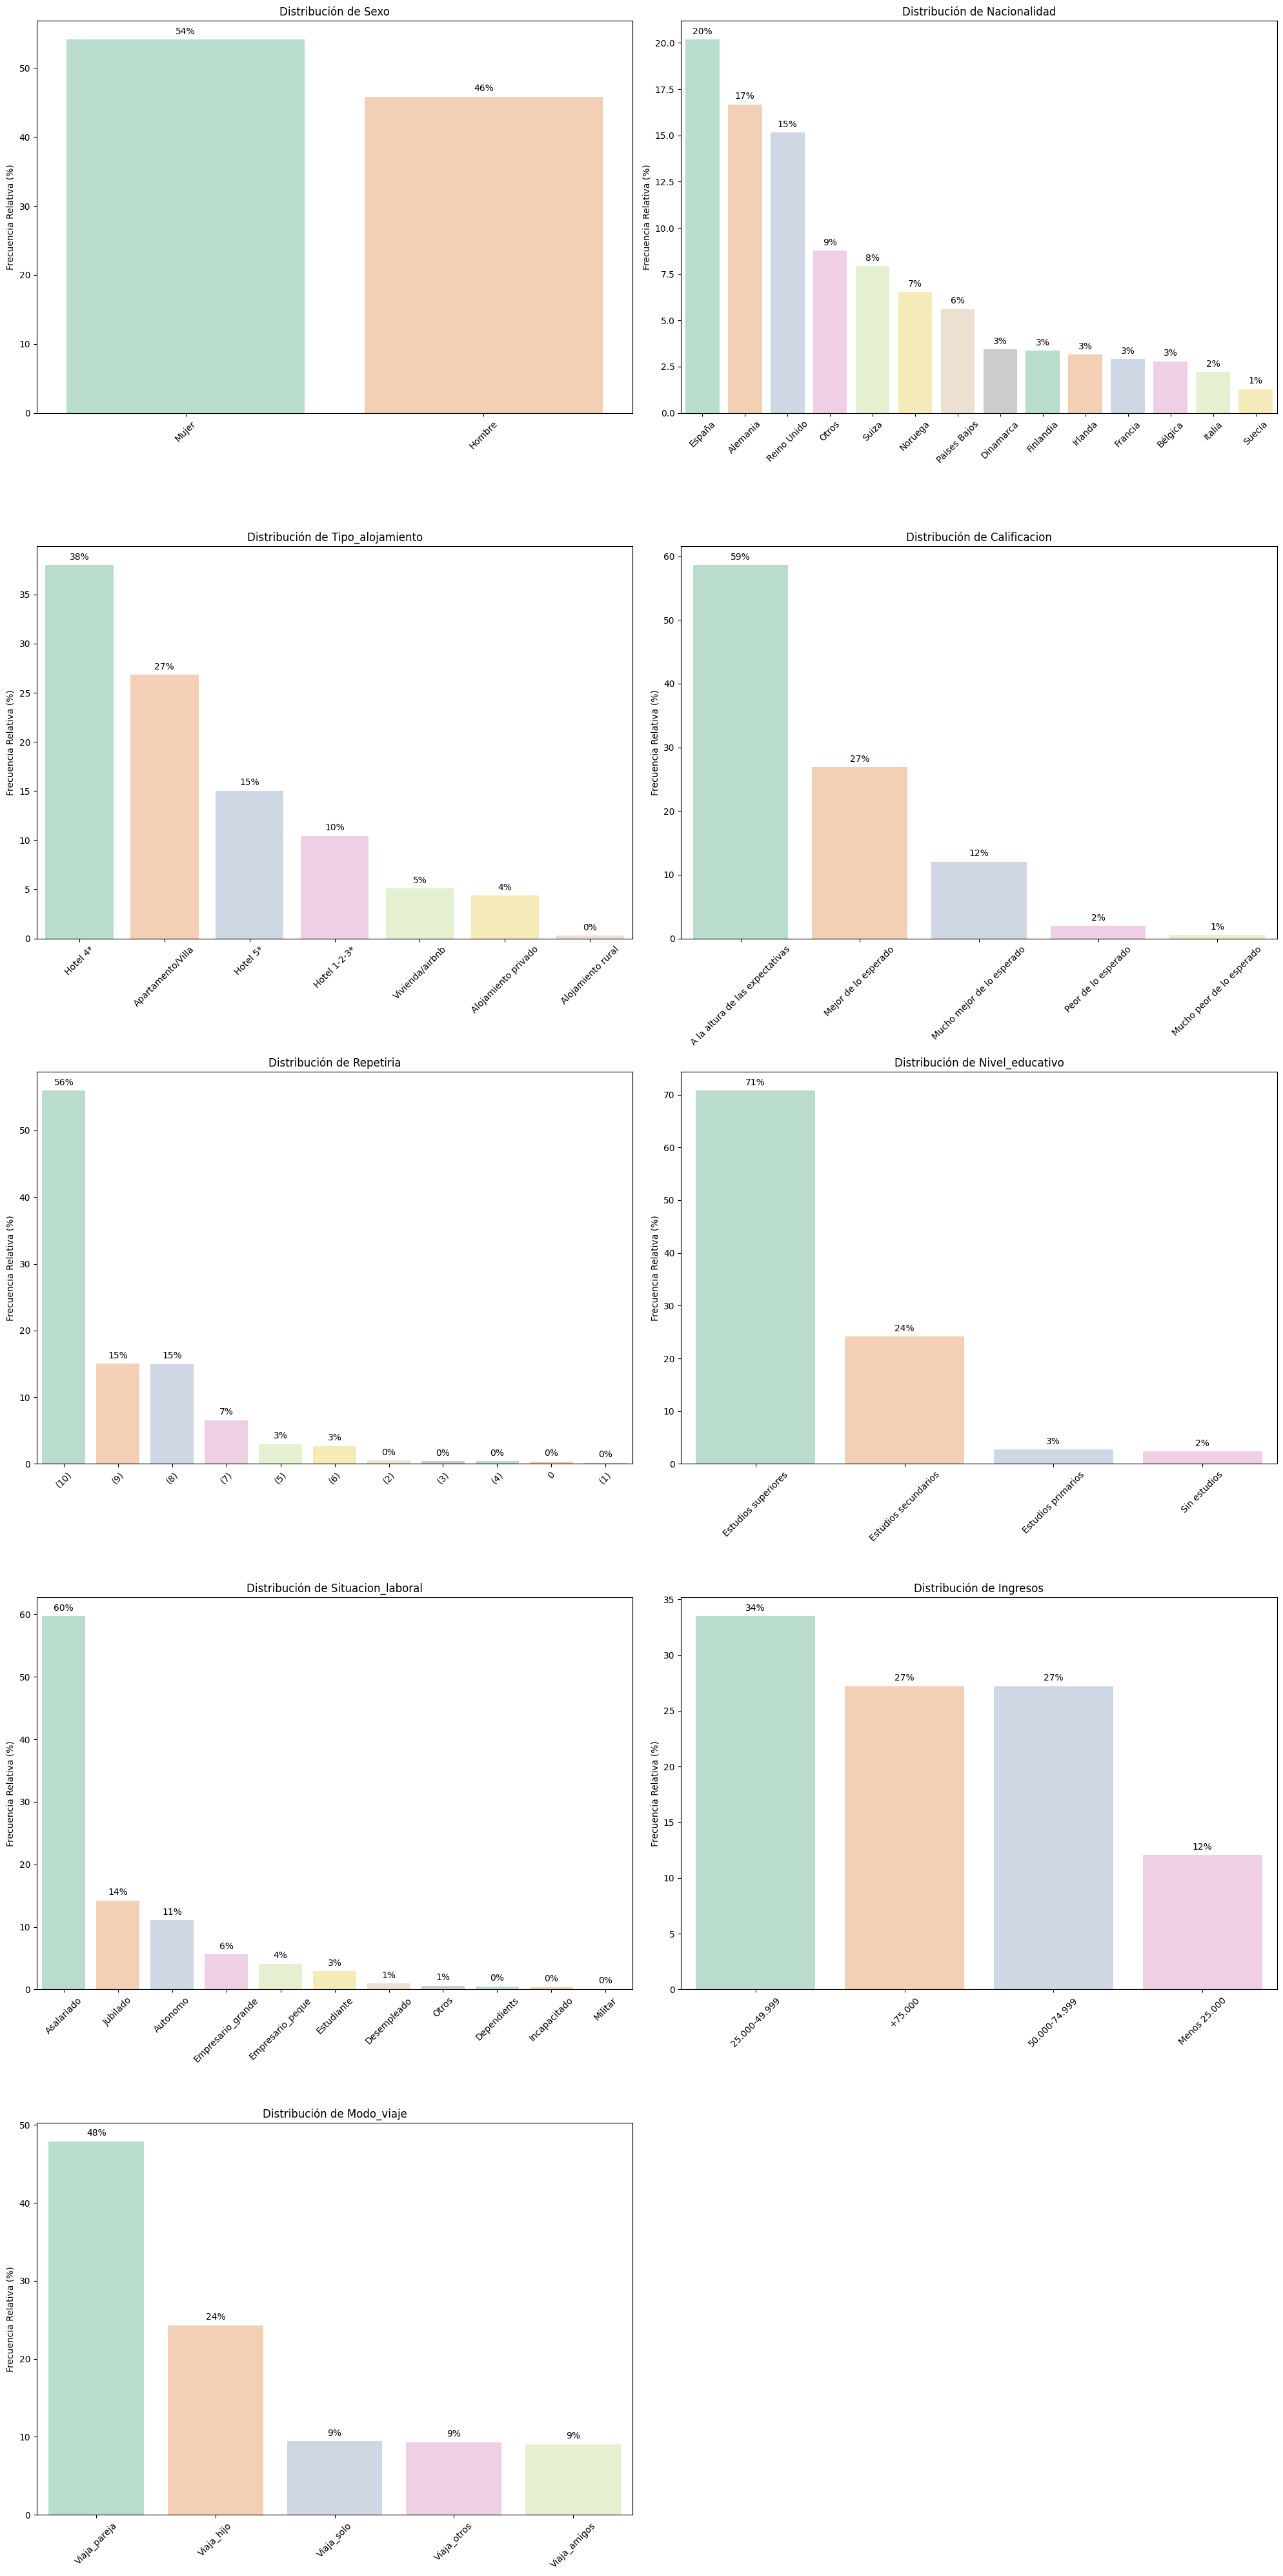

In [533]:
funciones.pinta_distribucion_categoricas(df_2022,variables_categoricas,relativa=True,mostrar_valores=True)

**Resumen analisis univariante de las variables categóricas**

En resumen:
|Variables|Categoría|2019|2022|
|-|-|-|-|
|Sexo| Mujer| 53% |54% |
|Nacionalidad| Alemania - España |18% - 17%|20% -17% |
|Tipo de alojamiento| Hotel 4*| 34%| 38%|
|Calificación| 10| 62%| 59%|
|Repetiría| 10| 51%| 56%|
|Nivel educativo| Estudios superiores| 67%| 71%|
|Situación laboral| Asalariados| 56%| 60%|
|Ingresos| 25.000-49.999| 36%| 34%|
|Modo_viaje| Pareja| 50%| 48%|

# **2.2 Variables numéricas**

In [534]:
#Variables numéricas
variables_numericas=["Edad","Noches","Coste_vuelos","Coste_alojamiento","Gastos","Horas_fuera_alojamiento","Visitas_totales_Islas","Visitas_total_GC","Personas_hogar"]

In [535]:
#Principales estadísticos en 2019
df_2019.describe()

Edad       Noches  Coste_vuelos  Coste_alojamiento       Gastos  \
count  6061.000000  6061.000000   6061.000000        6061.000000  6061.000000   
mean     47.726283     7.975747    366.042686         287.616715   360.302976   
std      14.614298     2.651963    298.708511         334.737851   279.043028   
min      16.000000     3.000000      1.000000           1.000000     0.000000   
25%      37.000000     7.000000     10.000000           1.592000   115.000000   
50%      48.000000     7.000000    349.000000          60.000000   338.000000   
75%      58.000000     9.000000    600.000000         585.000000   567.000000   
max      87.000000    14.000000    999.000000         999.000000   999.000000   

       Horas_fuera_alojamiento  Visitas_totales_Islas  Visitas_total_GC  \
count              6061.000000            6061.000000       6061.000000   
mean                  7.215476               5.016994          2.812572   
std                   3.942085               3.562623          2.510804   
min                   0.000000               1.000000          0.000000   
25%                   4.000000               2.000000          1.000000   
50%                   7.000000               4.000000          2.000000   
75%                  10.000000               7.000000          4.000000   
max                  19.000000              17.000000         11.000000   

       Personas_hogar     Año  
count     6061.000000  6061.0  
mean         2.359677  2019.0  
std          0.915930     0.0  
min          1.000000  2019.0  
25%          2.000000  2019.0  
50%          2.000000  2019.0  
75%          3.000000  2019.0  
max          4.000000  2019.0

Edad y duración de la estancia: La edad media del turista es de 48 años, y su estancia promedio en la isla es de 8 noches.

Costes y visitas: El coste medio de los vuelos es de 366€, mientras que el gasto en alojamiento asciende a 287€ y su gasto medio en la durante su estancia es de 360€. En promedio, los turistas han visitado las Islas Canarias unas 7 veces y, en particular, Gran Canaria en 3 ocasiones.

Composición del hogar y tiempo fuera del alojamiento: El hogar promedio de estos turistas está compuesto por 3 persona, y pasan un promedio de 8 horas al día fuera del alojamiento.

In [536]:
#Principales estadísticos en 2022
df_2022.describe()

Edad       Noches  Coste_vuelos  Coste_alojamiento       Gastos  \
count  6234.000000  6234.000000   6234.000000        6234.000000  6234.000000   
mean     48.074110     7.880173    351.804917         234.945677   341.690813   
std      14.262611     2.648372    310.289803         322.943185   294.716489   
min      16.000000     3.000000      1.000000           1.000000     0.000000   
25%      38.000000     7.000000      2.132250           1.571250     2.403000   
50%      49.000000     7.000000    320.000000           2.949500   313.000000   
75%      58.000000     9.000000    600.000000         493.000000   580.000000   
max      85.000000    14.000000    999.000000         999.000000   999.000000   

       Horas_fuera_alojamiento  Visitas_totales_Islas  Visitas_total_GC  \
count              6234.000000            6234.000000       6234.000000   
mean                  6.757940               5.069137          2.706449   
std                   3.779451               3.589859          2.424036   
min                   0.000000               1.000000          0.000000   
25%                   4.000000               2.000000          1.000000   
50%                   6.000000               4.000000          2.000000   
75%                  10.000000               7.000000          3.000000   
max                  15.000000              17.000000         11.000000   

       Personas_hogar     Año  
count     6234.000000  6234.0  
mean         2.325634  2022.0  
std          0.923251     0.0  
min          1.000000  2022.0  
25%          2.000000  2022.0  
50%          2.000000  2022.0  
75%          3.000000  2022.0  
max          4.000000  2022.0

Edad y duración de la estancia: La edad media del turista es de 48 años, y su estancia promedio en la isla es de 9 noches.

Costes y visitas: El coste medio de los vuelos es de 352€, mientras que el gasto en alojamiento asciende a 235€ y su gasto durante las vacaciones es de 342€ de media. En promedio, los turistas han visitado las Islas Canarias unas 5 veces y, en particular, Gran Canaria en 3 ocasiones.

Composición del hogar y tiempo fuera del alojamiento: El hogar promedio de estos turistas está compuesto por 3 persona, y pasan un promedio de 6 horas al día fuera del alojamiento.

A diferencia del 2019, si hay una disminucion en las horas medias que los turistas pasan fuera del alojaminendo siendo 6h de media en el 2022, puede tener relación con las restricciones sanitarias y la inseguridad de la exposición en zonas de aglomeraciones.

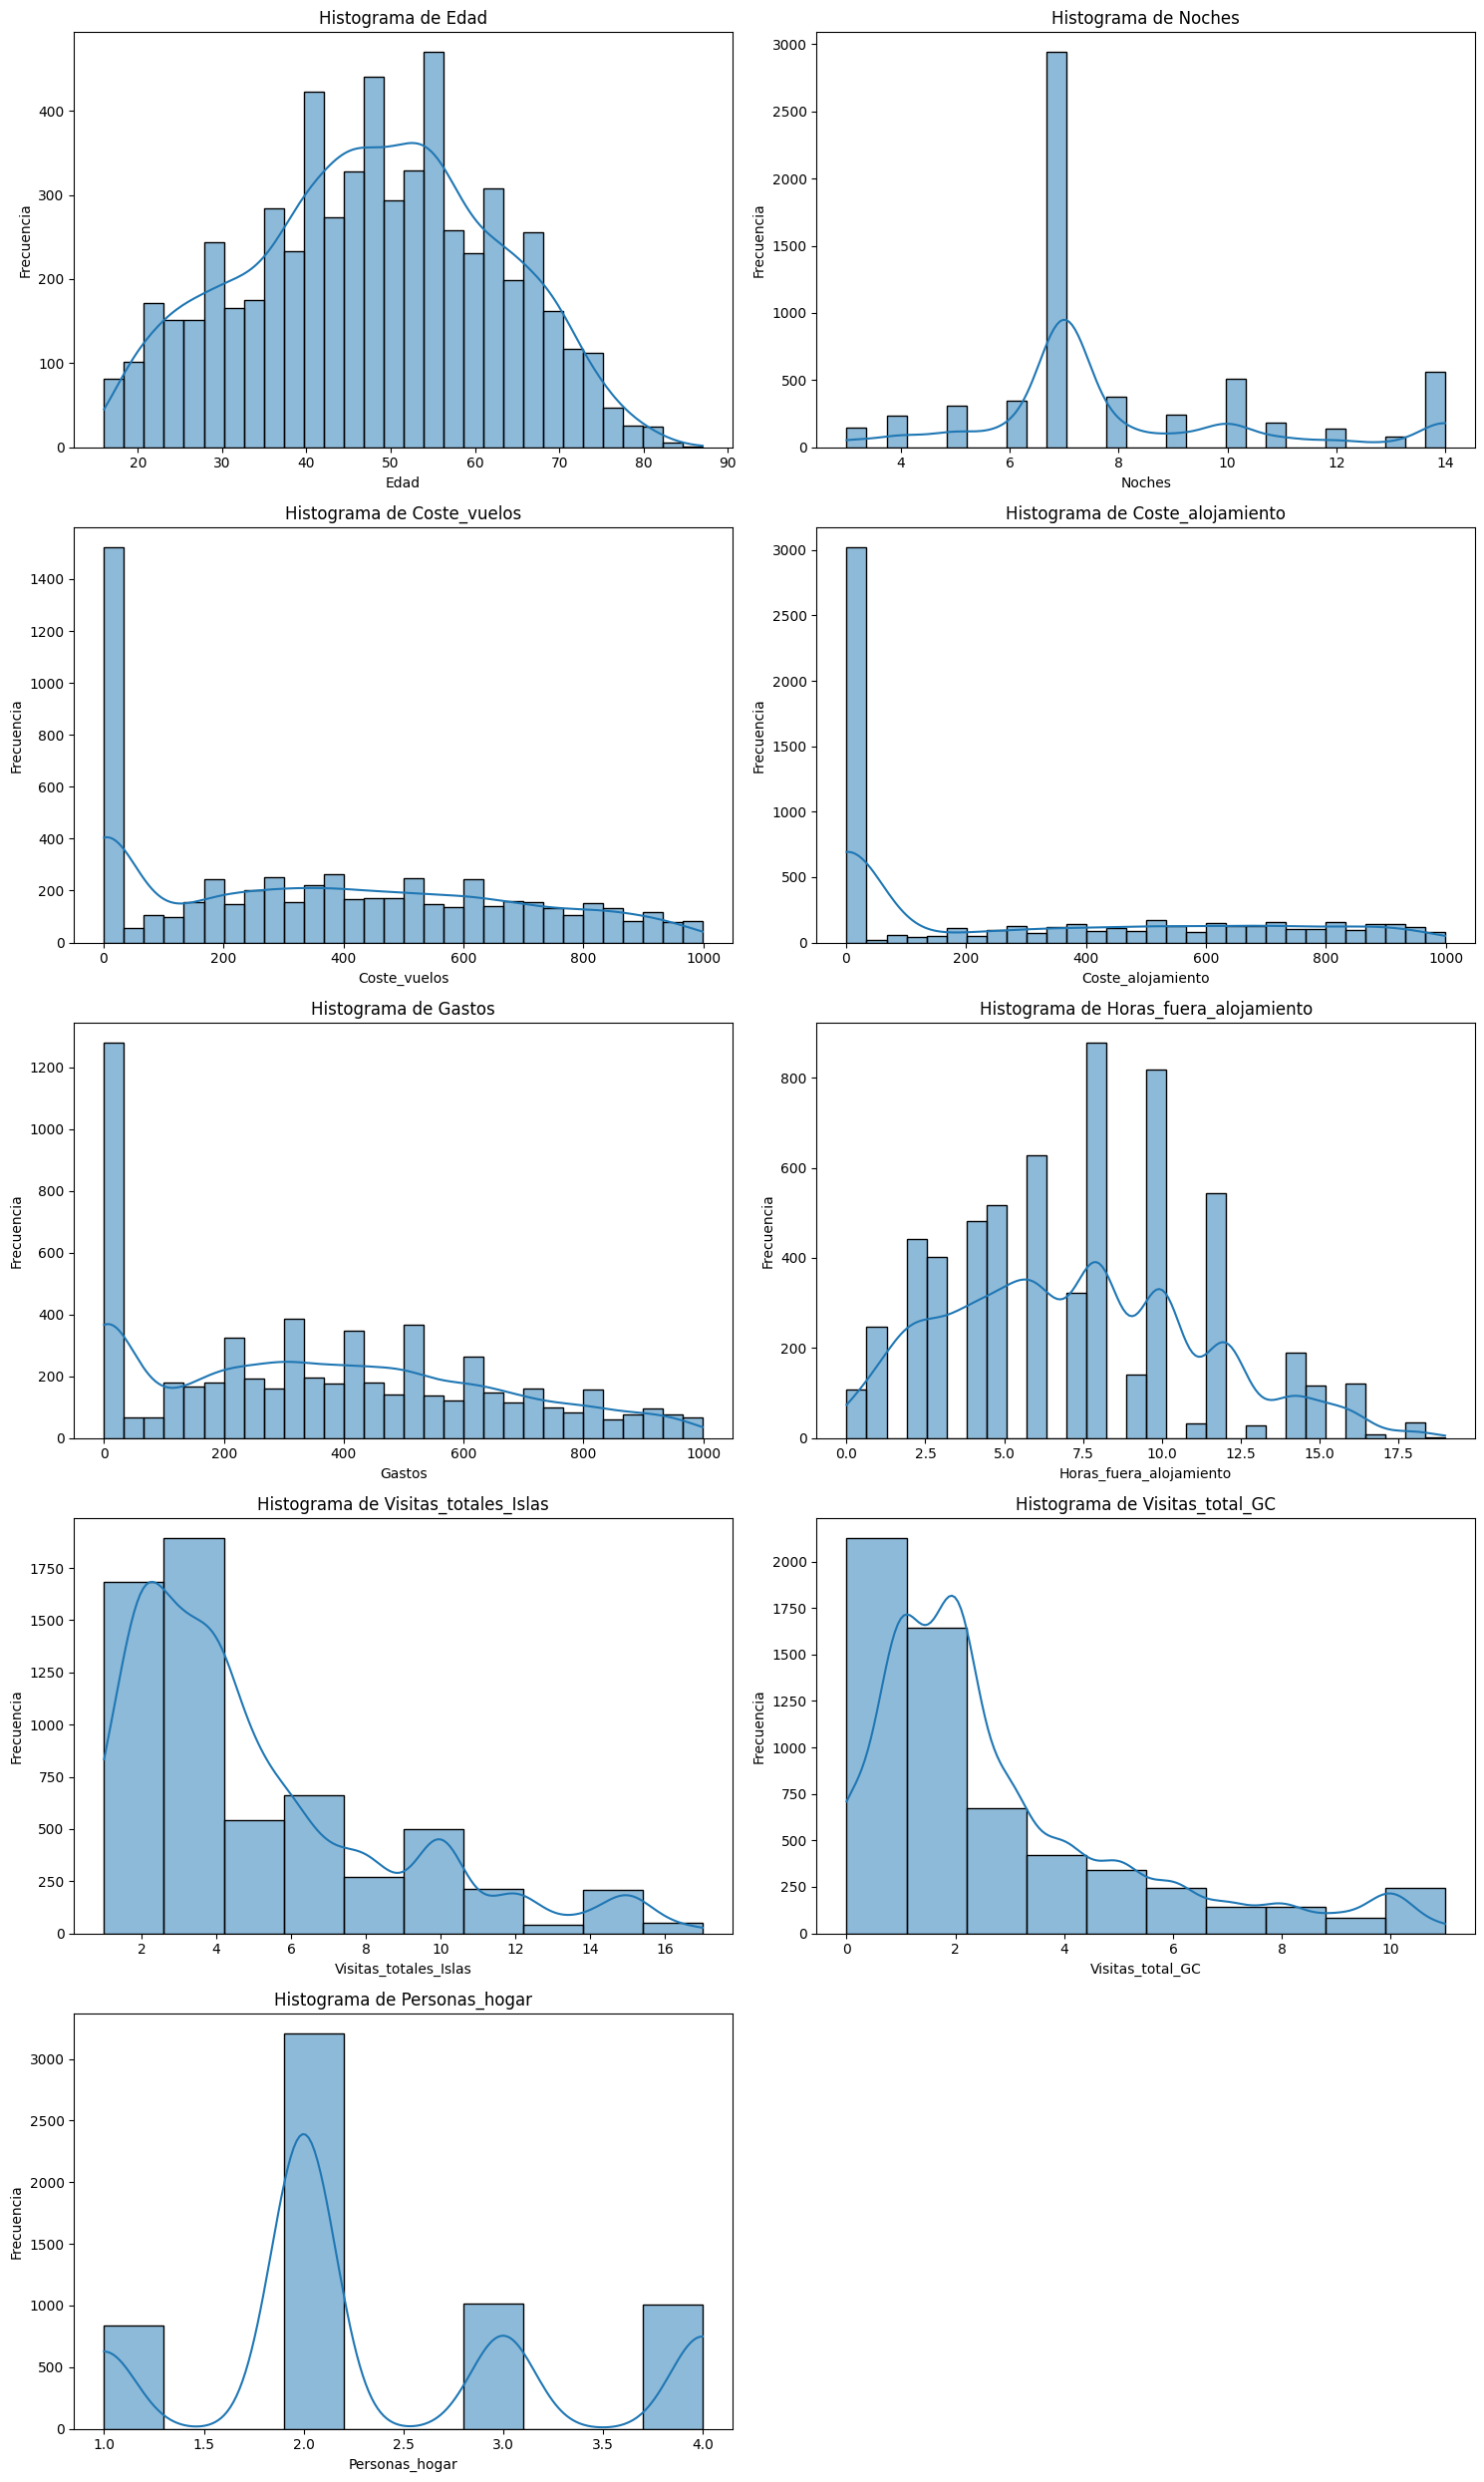

In [537]:
funciones.plot_numerical_histograms(df_2019, variables_numericas, bins_list=[30,30,30,30,30,30], kde=True)

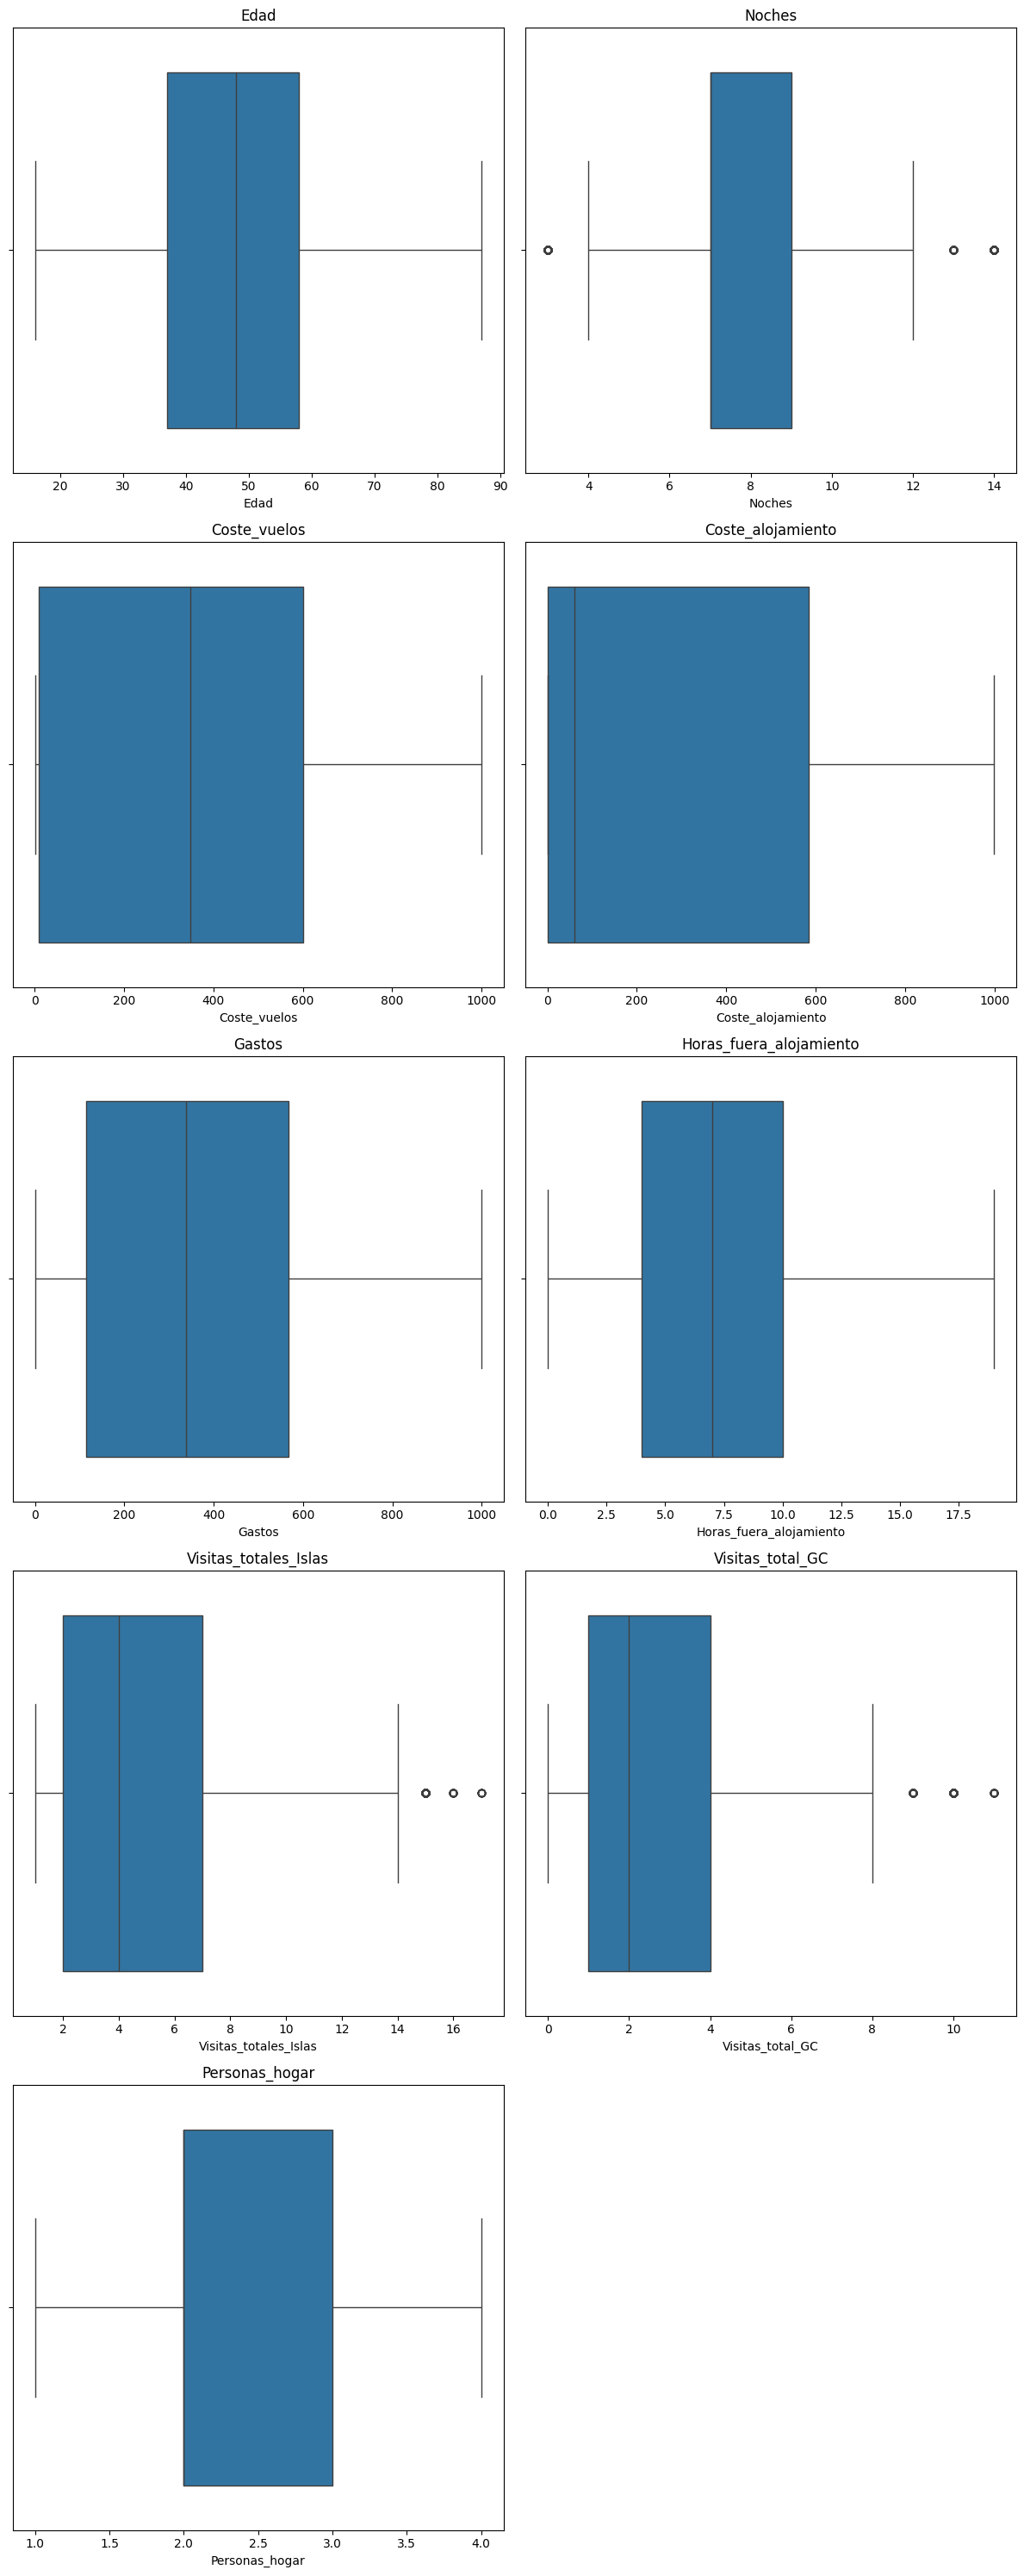

In [538]:
funciones.plot_multiple_boxplots(df_2019, variables_numericas)

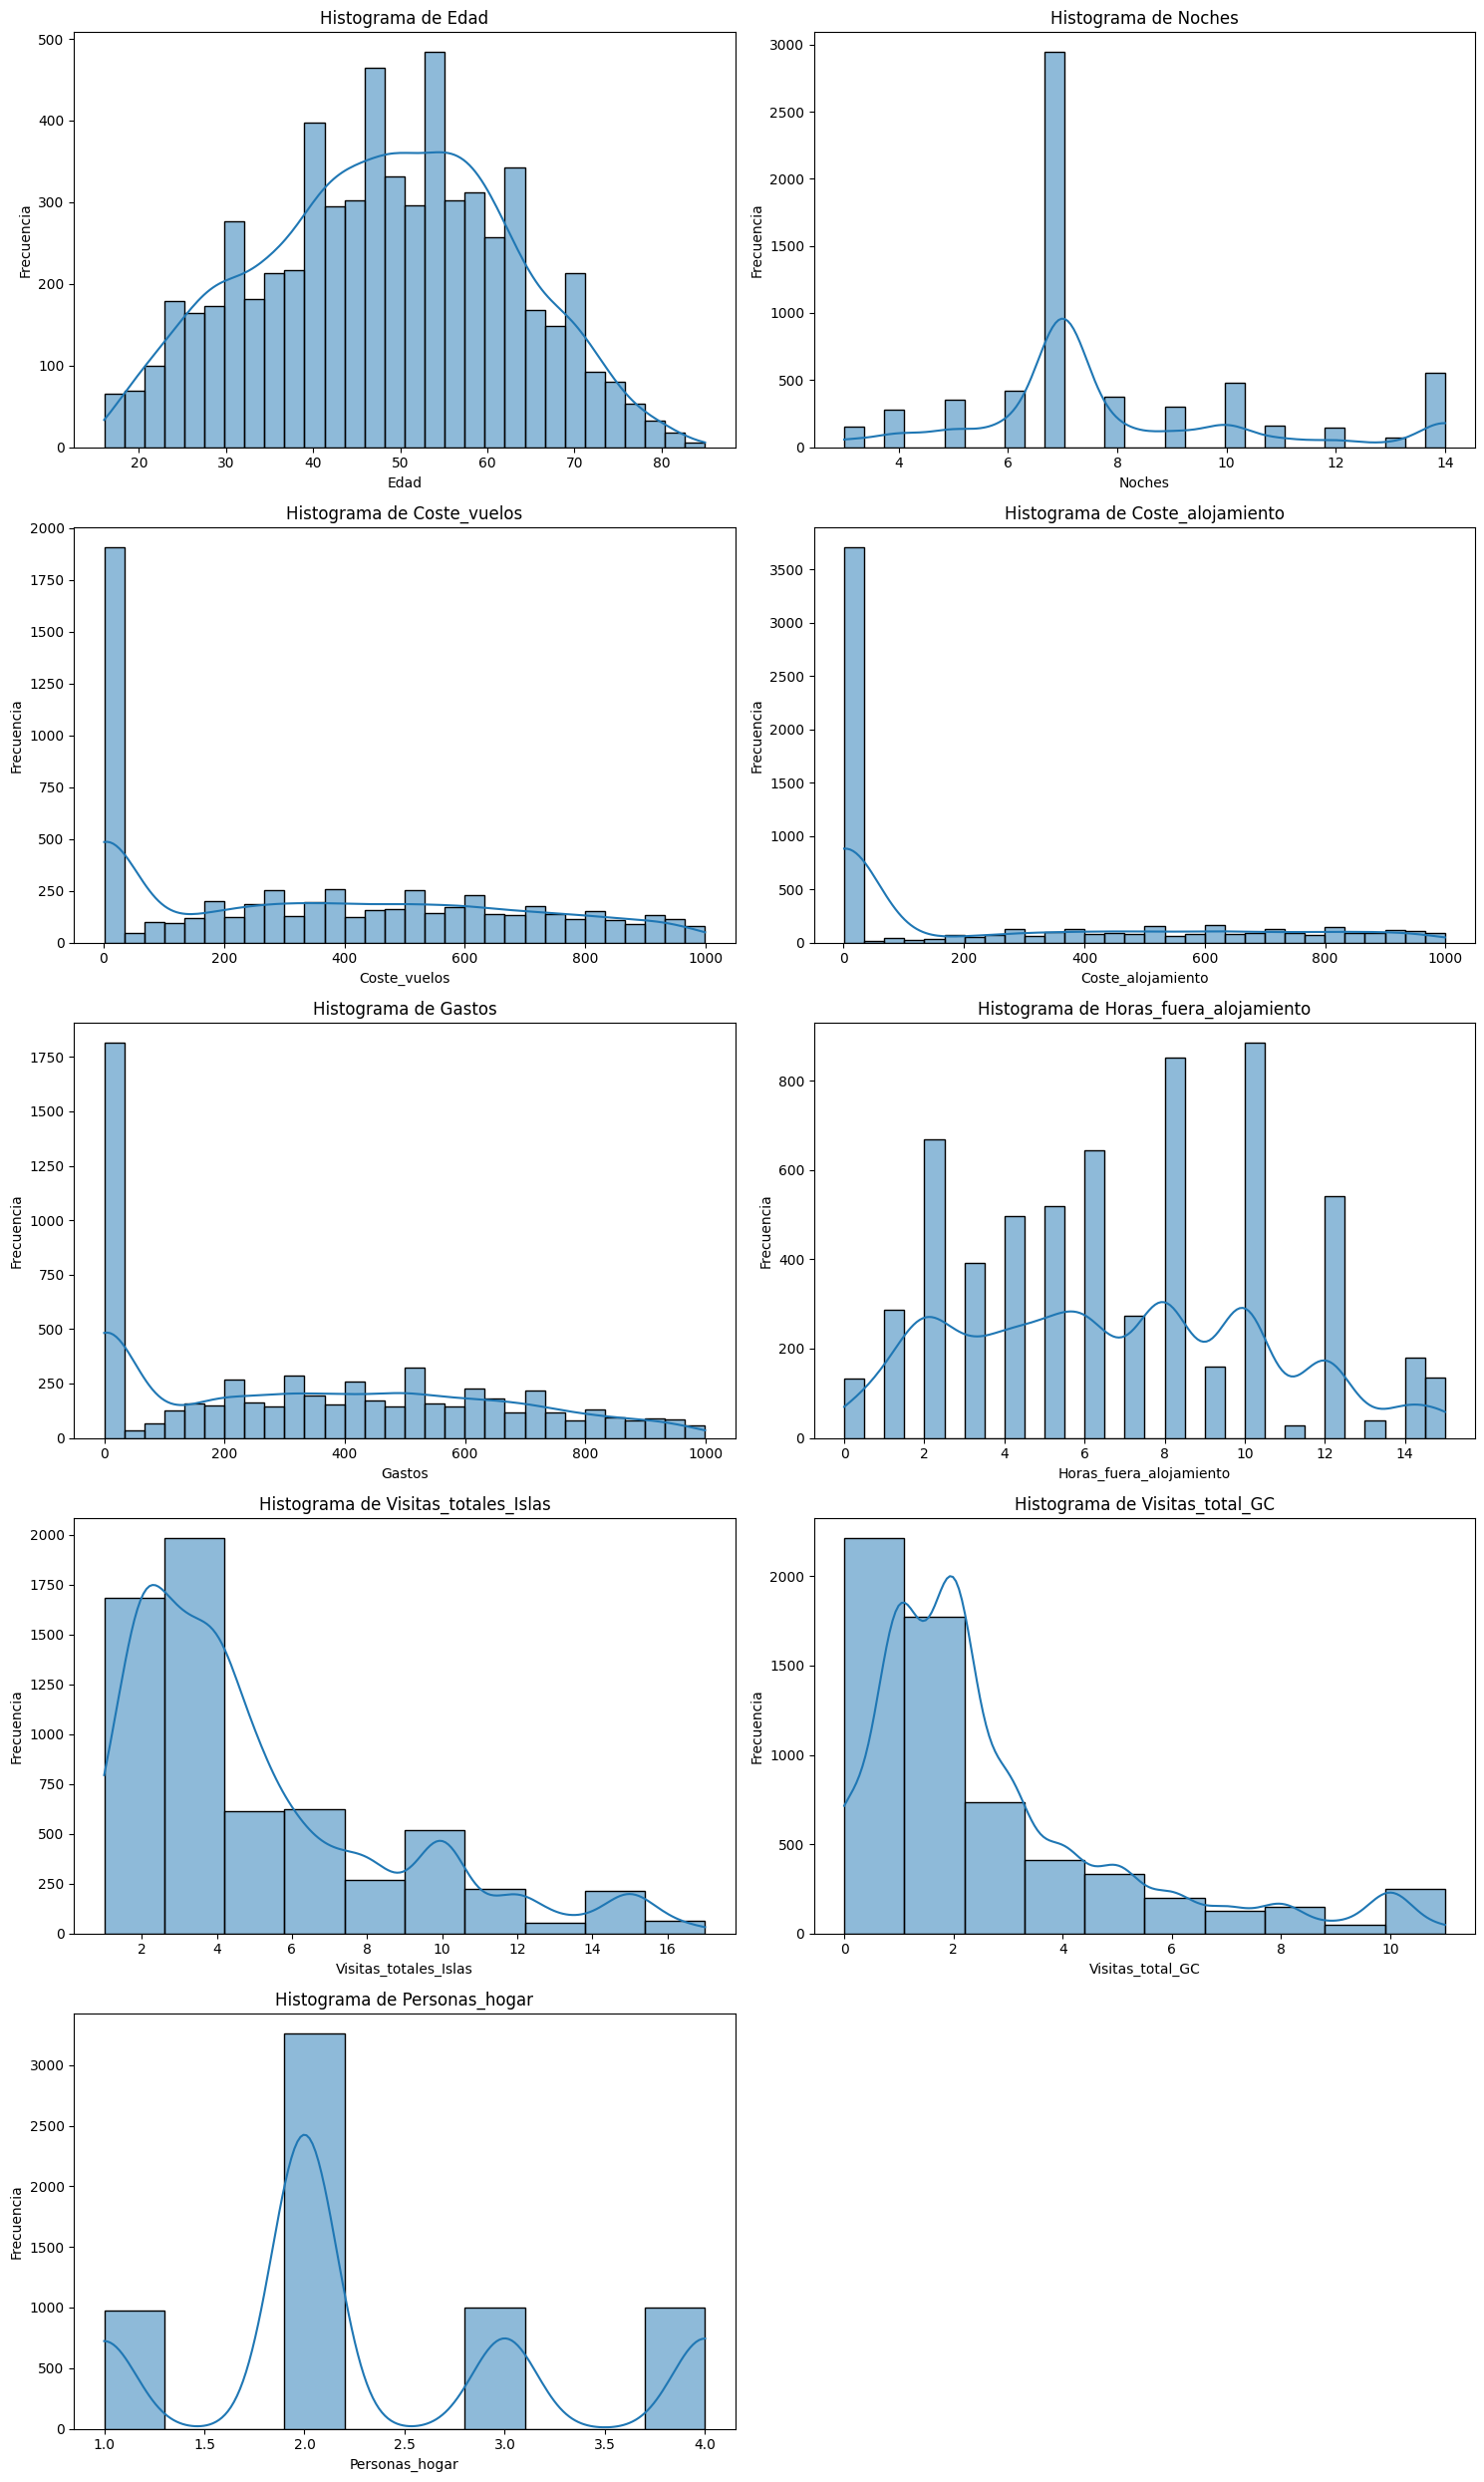

In [539]:
funciones.plot_numerical_histograms(df_2022, variables_numericas, bins_list=[30,30,30,30,30,30], kde=True)

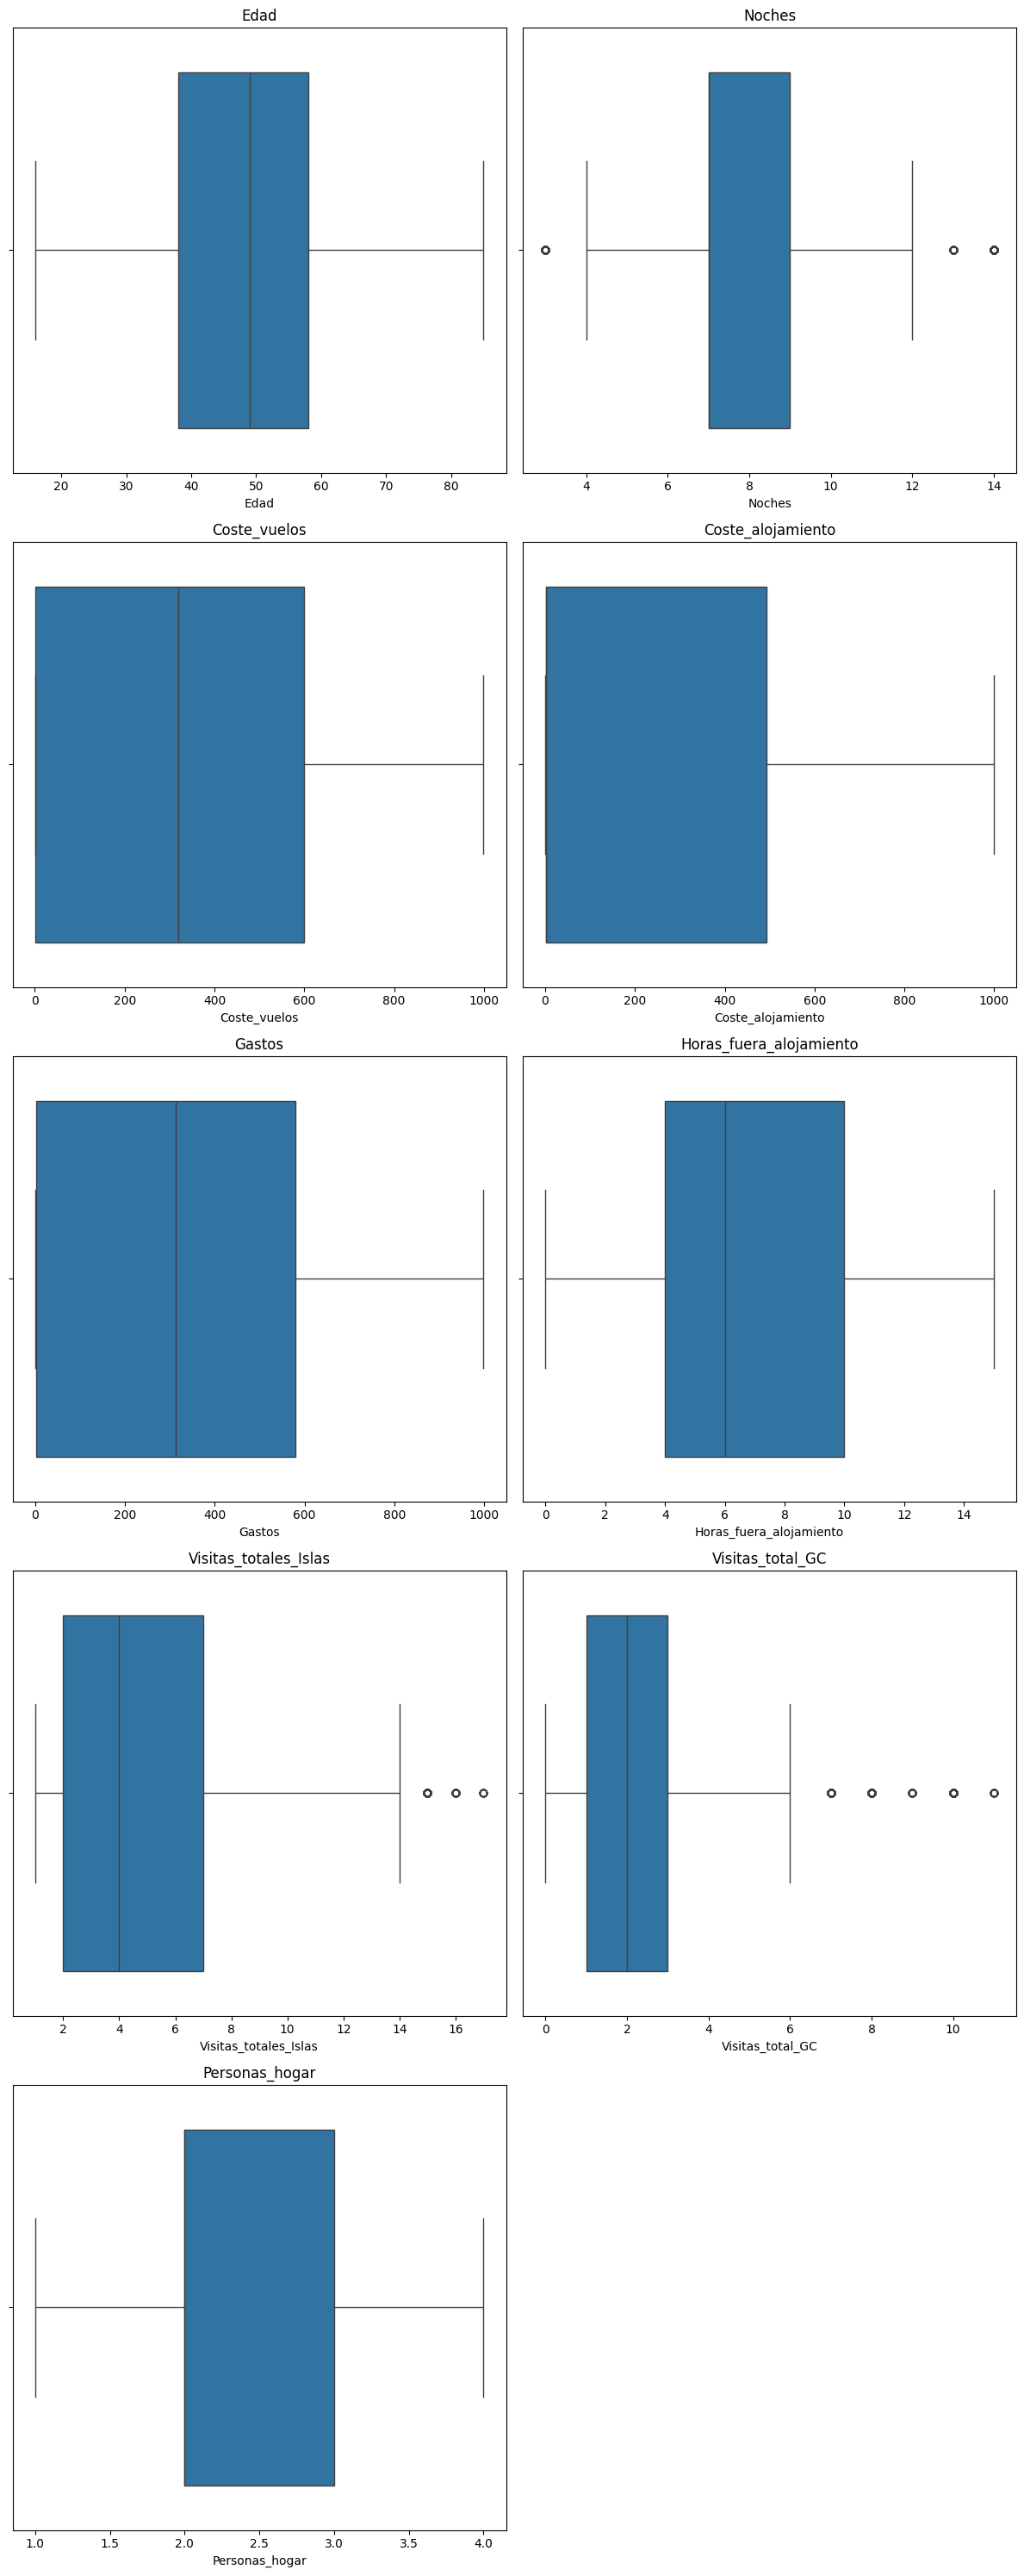

In [540]:
funciones.plot_multiple_boxplots(df_2022, variables_numericas)

Veamos 2022 en profundidad

In [541]:
def variabilidad(df_perfil_turistico):
    # Seleccionar solo las columnas numéricas
    df_numericas = df_perfil_turistico.select_dtypes(include=["number"])
    
    # Calcular el resumen estadístico y seleccionar las filas de std y mean
    df_var = df_numericas.describe().loc[["std", "mean"]].T
    
    # Calcular el Coeficiente de Variación (CV)
    df_var["CV"] = df_var["std"] / df_var["mean"]
    
    return df_var

In [542]:
variabilidad(df_perfil_turistico)

std         mean        CV
Edad                      14.437511    47.902643  0.301393
Noches                     2.650466     7.927288  0.334347
Coste_vuelos             304.706450   358.823633  0.849182
Coste_alojamiento        329.849914   260.910635  1.264226
Gastos                   287.236100   350.865951  0.818649
Horas_fuera_alojamiento    3.867095     6.983489  0.553748
Visitas_totales_Islas      3.576408     5.043432  0.709122
Visitas_total_GC           2.467661     2.758764  0.894481
Personas_hogar             0.919770     2.342416  0.392659
Año                        1.499913  2020.521106  0.000742

- Alta dispersión: Las variables como "Coste de los vuelos", "Coste de alojamiento", "Gastos" y "Visitas totales GC" tienen un coeficiente de variación alto, lo que indica que hay una gran dispersión en torno a la media, es decir, valores extremos o muy diferentes.
- Baja dispersión: Variables como "Edad", "Horas fuera de alojamiento", y "Personas en el hogar" tienen un coeficiente de variación más bajo, lo que indica que los datos son más homogéneos.
- Año: La variable "Año" tiene una dispersión casi nula, sugiriendo que todos los datos provienen del mismo período (probablemente 2020).

Sería interesante segmentar más los datos por tipo de alojamiento para ver patrones más detallados en los viajeros que eligen alojamientos más caros versus más baratos.

In [543]:
# Agrupar por tipo de alojamiento y calcular estadísticas descriptivas
segmentado_por_alojamiento = df_2022.groupby('Tipo_alojamiento').agg({
    'Coste_alojamiento': ['mean', 'std', 'min', 'max'],
    'Gastos': ['mean', 'std', 'min', 'max'],
    'Noches': ['mean', 'std', 'min', 'max'],
    'Visitas_totales_Islas': ['mean', 'std', 'min', 'max'],
    'Visitas_total_GC': ['mean', 'std', 'min', 'max'],
    'Edad': ['mean', 'std']
})

print(segmentado_por_alojamiento)

                    Coste_alojamiento                                Gastos  \
                                 mean         std    min    max        mean   
Tipo_alojamiento                                                              
Alojamiento privado        315.425911  294.090772  1.000  983.0  318.426649   
Alojamiento rural          250.639765  349.617364  1.001  986.0  271.475353   
Apartamento/Villa          299.952274  326.739334  1.000  999.0  339.315747   
Hotel 1-2-3*                97.020444  249.666415  1.000  997.0  350.684813   
Hotel 4*                   191.569880  316.103296  1.000  998.0  344.446905   
Hotel 5*                   280.664655  336.522531  1.000  996.0  349.529863   
Vivienda/airbnb            294.693101  330.256622  1.000  999.0  315.633700   

                                               Noches            ...  \
                            std  min    max      mean       std  ...   
Tipo_alojamiento                                                 

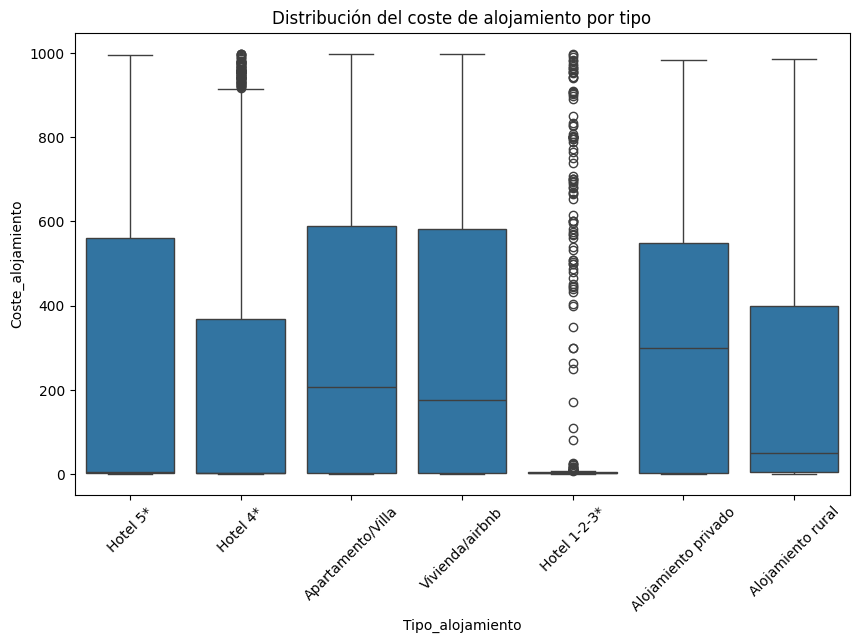

In [544]:
# Crear un boxplot del coste de alojamiento por tipo de alojamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo_alojamiento', y='Coste_alojamiento', data=df_2022)
plt.title('Distribución del coste de alojamiento por tipo')
plt.xticks(rotation=45)
plt.show()

In [545]:
# Filtrar los datos según tipo de alojamiento
alojamiento_privado = df_2022[df_2022['Tipo_alojamiento'] == 'Alojamiento privado']['Coste_alojamiento']
alojamiento_rural = df_2022[df_2022['Tipo_alojamiento'] == 'Alojamiento rural']['Coste_alojamiento']
apartamento_villa = df_2022[df_2022['Tipo_alojamiento'] == 'Apartamento/Villa']['Coste_alojamiento']
hotel_1_2_3 = df_2022[df_2022['Tipo_alojamiento'] == 'Hotel 1-2-3*']['Coste_alojamiento']
hotel_4 = df_2022[df_2022['Tipo_alojamiento'] == 'Hotel 4*']['Coste_alojamiento']
hotel_5 = df_2022[df_2022['Tipo_alojamiento'] == 'Hotel 5*']['Coste_alojamiento']
vivienda_airbnb = df_2022[df_2022['Tipo_alojamiento'] == 'Vivienda/airbnb']['Coste_alojamiento']

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(
    alojamiento_privado, alojamiento_rural, apartamento_villa, 
    hotel_1_2_3, hotel_4, hotel_5, vivienda_airbnb
)

# Mostrar los resultados
print(f"Estadística F: {f_statistic}, P-value: {p_value}")

Estadística F: 48.03596228096282, P-value: 6.359282481677296e-58


Dado que el valor p es mucho menor que 0.05, podemos concluir que sí existen diferencias significativas en los costes de alojamiento entre al menos dos de los tipos de alojamiento que has analizado. Esto sugiere que los diferentes tipos de alojamiento tienen costes de alojamiento muy diferentes.

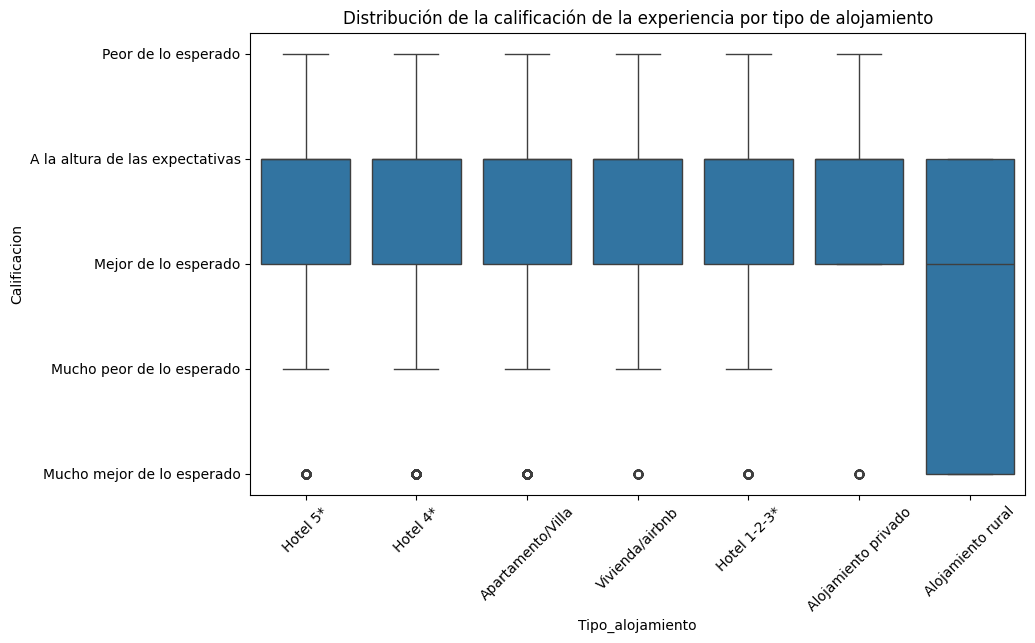

In [546]:
# Crear un boxplot de la calificación de la experiencia por tipo de alojamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo_alojamiento', y='Calificacion', data=df_2022)
plt.title('Distribución de la calificación de la experiencia por tipo de alojamiento')
plt.xticks(rotation=45)
plt.show()

# ***Análisis bivariantes***

Es momento de analizar si existe alguna relación entre las variables de nuestro dataset. Estas relaciones pueden adoptar diferentes formas:

- Independencia: cuando no hay relación entre las variables.
- Correlación: cuando las variables cambian de manera simultánea, aunque no necesariamente en la misma dirección o con una relación causal.
- Causalidad: cuando el cambio en una variable provoca un cambio en otra como consecuencia directa.
Dado que contamos con un gran número de variables, este [estudio bivariante](notebooks/notebooks_EDA_anailisis_bivariante.ipynb) se ha realiazado en un notebook a parte y aqui estudiaremos prestaremos especial atención a los resultados obtenidos donde destacan relaciones atípicas o inusuales

Basandonos en los resultados obtenidos, vamos a hacer tres analisis principales.
1. Relación entre Edad y Calificación de la experiencia: analizar si la edad de los participantes está asociada con su calificación de la experiencia.
Sabemos que la Estadística F para la edad por calificación de la experiencia es 14.60, y el valor p es muy bajo (7.1e-12), lo que indica que existe una diferencia significativa entre las edades de los participantes y sus calificaciones de la experiencia. Esto sugiere que los viajeros de diferentes rangos de edad podrían tener diferentes percepciones de su experiencia, lo cual merece un análisis bivariante detallado.

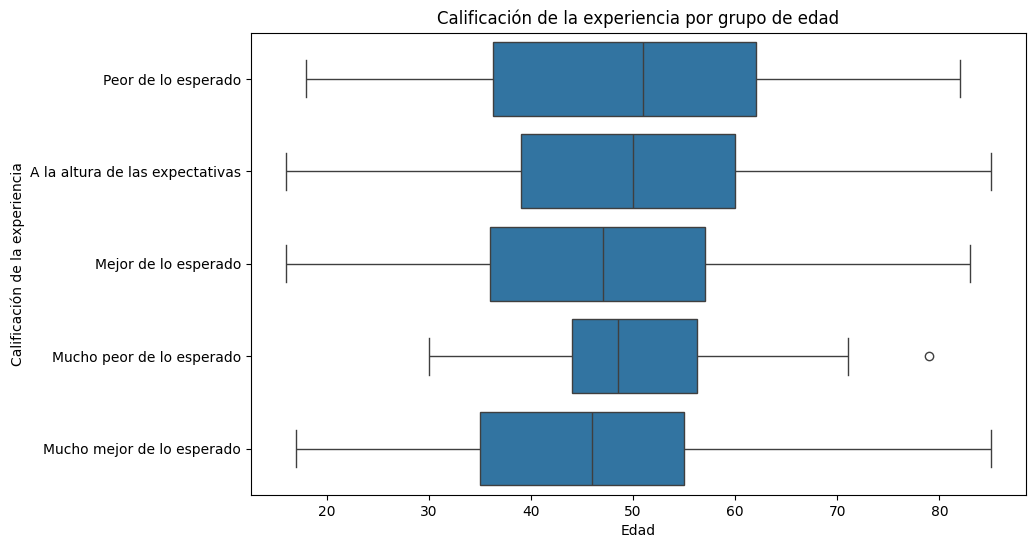

In [547]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Edad', y='Calificacion', data=df_2022)
plt.title('Calificación de la experiencia por grupo de edad')
plt.xlabel('Edad')
plt.ylabel('Calificación de la experiencia')
plt.show()

Se observa las diferencias en las calificaciones y explorar cómo varían las opiniones según la edad.

2. Relación entre Noches y Visitas totales a las Islas (Visitas_totales_Islas): Analizar si la duración de la estancia (en noches) influye en la cantidad de visitas realizadas a las islas.
Justificación: El valor p para las visitas totales a las Islas (p=7.40e-06) es bajo, indicando que las visitas están influenciadas por otros factores como la duración de la estancia (número de noches). Este análisis bivariante podría desvelar cuán fuerte es la relación entre ambos factores.

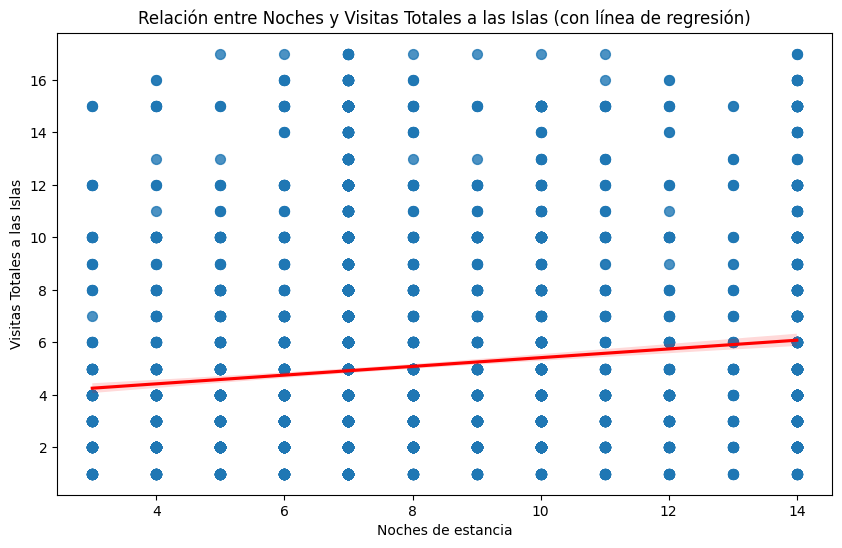

In [548]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Noches', y='Visitas_totales_Islas', data=df_2022, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Relación entre Noches y Visitas Totales a las Islas (con línea de regresión)')
plt.xlabel('Noches de estancia')
plt.ylabel('Visitas Totales a las Islas')
plt.show()

Podemos concluir que hay una relación lineal entre el número de noches y las visitas totales a las islas.


3. Relación entre Coste de Alojamiento y Tipo de Alojamiento:Ver si el tipo de alojamiento influye en el coste del alojamiento.
Justificación: El valor p para el análisis de "Coste_alojamiento por Tipo_alojamiento" es muy bajo (6.1e-58), lo que indica que el tipo de alojamiento tiene un efecto significativo sobre el coste. Esto implica que los viajeros que eligen diferentes tipos de alojamiento tienden a tener diferentes rangos de costes, lo que sería interesante explorar más a fondo.

C:\Users\Carol\AppData\Local\Temp\ipykernel_10168\706280357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo_alojamiento', y='Coste_alojamiento', data=df_2022, order=orden, palette='Pastel2')


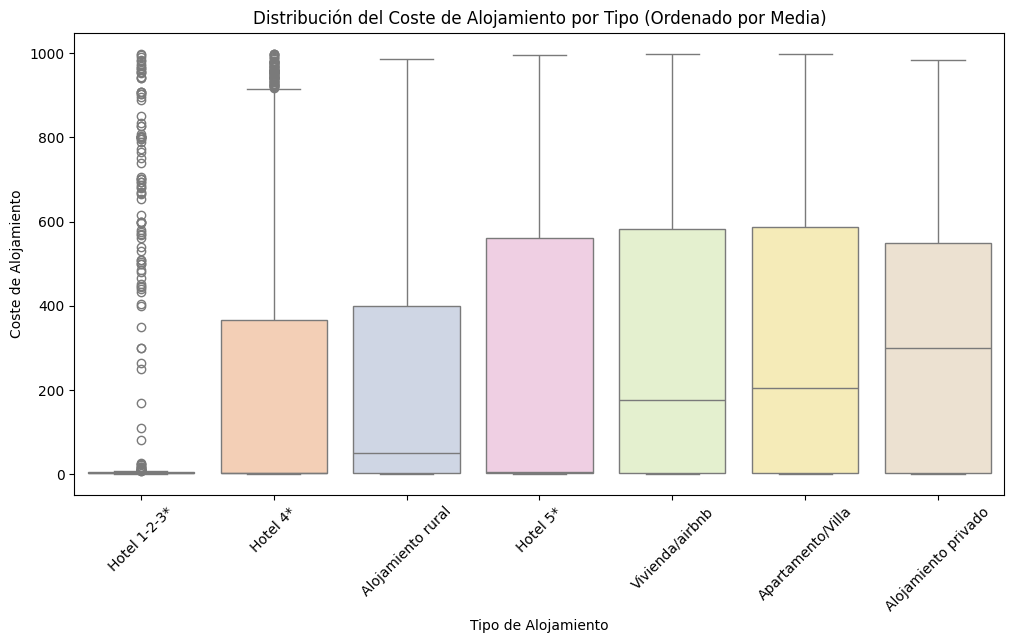

In [549]:
# Boxplot con orden personalizado
orden = df_2022.groupby('Tipo_alojamiento')['Coste_alojamiento'].mean().sort_values().index

plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo_alojamiento', y='Coste_alojamiento', data=df_2022, order=orden, palette='Pastel2')
plt.title('Distribución del Coste de Alojamiento por Tipo (Ordenado por Media)')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Coste de Alojamiento')
plt.xticks(rotation=45)
plt.show()

Podríamos concluir que el tipo de alojamiento influye en el coste.

Por último, veamos la realción que existe entre las noches por nacionalidad

In [550]:

tabla_contingencia_nacionalidad = pd.crosstab(df_2022['Noches'], df_2022['Nacionalidad'])


In [551]:

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_nacionalidad)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
#print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1514.766087498414
P-Value: 1.2693171367299605e-227
Grados de Libertad: 143


Este es un valor muy alto, lo que indica una gran discrepancia entre las frecuencias observadas y las esperadas bajo la hipótesis de independencia. Esto sugiere que podría haber una relación significativa entre las variables.

Un valor p tan bajo indica que rechazamos la hipótesis nula. Esto significa que existe una relación significativa entre las Noches y la Nacionalidad
Grados de Libertad: 143

Un número alto de grados de libertad refleja que estamos analizando una tabla con muchas combinaciones posibles entre las categorías de ambas variables.

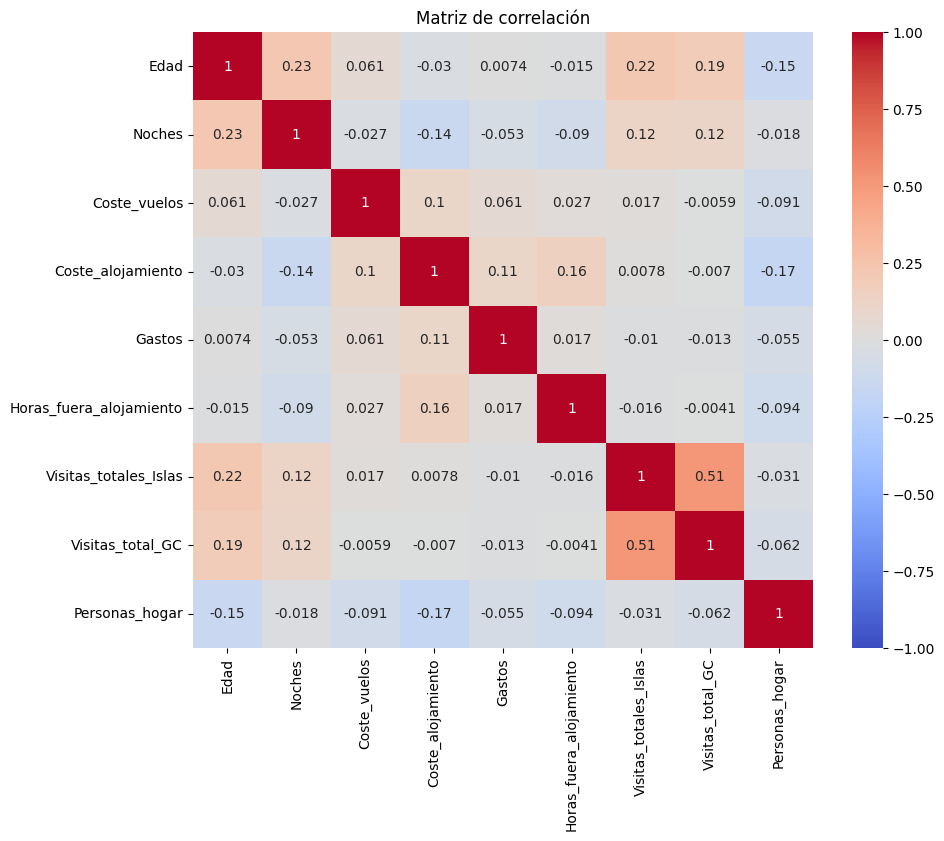

In [552]:
# Calcular la matriz de correlación
correlation_matrix = df_2022[variables_numericas].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

Tonos cálidos (rojo) indican correlaciones positivas fuertes (próximas a 
1
1).
Tonos fríos (azul) indican correlaciones negativas fuertes (próximas a 
−
1
−1).
Tonos blancos o neutros indican correlaciones débiles o inexistentes (próximas a 
0
0).

* Correlaciones a destacar:

Visitas totales a GC vs Visitas totales a las Islas (0.51)

Esto significa que, en general, a medida que aumenta el número de visitas a Gran Canaria, también aumentan las visitas totales a las Islas Canarias. Sin embargo, esta relación no es perfectamente lineal.
Esto tiene sentido ya que Gran Canaria (GC) es una de las principales islas del archipiélago de Canarias, por lo que es razonable que haya una relación entre las visitas a GC y el total de visitas a todas las islas.
Sin embargo, el hecho de que la correlación no sea más alta sugiere que:
Las visitas a otras islas (como Tenerife, Lanzarote, etc.) también contribuyen de manera importante al total.
O que algunos turistas visitan solo otras islas, sin incluir GC en su itinerario.

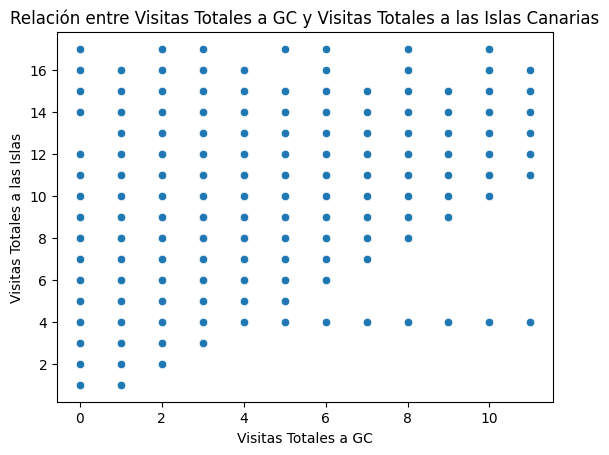

In [553]:
sns.scatterplot(x='Visitas_total_GC', y='Visitas_totales_Islas', data=df_2022)
plt.title('Relación entre Visitas Totales a GC y Visitas Totales a las Islas Canarias')
plt.xlabel('Visitas Totales a GC')
plt.ylabel('Visitas Totales a las Islas')
plt.show()

La correlación de -0.17 indica que el número de Personas en el Hogar tiene una relación muy débil con los Costes de Alojamiento, pero puede ser interesante explorar si otros factores (tipo de alojamiento o nivel de ingresos) desempeñan un papel más importante.

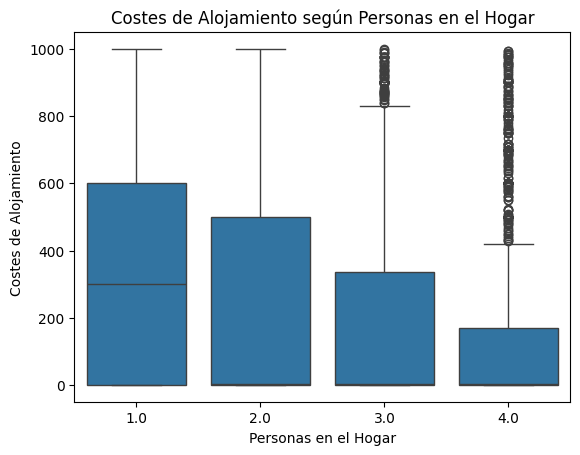

In [554]:
sns.boxplot(x='Personas_hogar', y='Coste_alojamiento', data=df_2022)
plt.title('Costes de Alojamiento según Personas en el Hogar')
plt.xlabel('Personas en el Hogar')
plt.ylabel('Costes de Alojamiento')
plt.show()

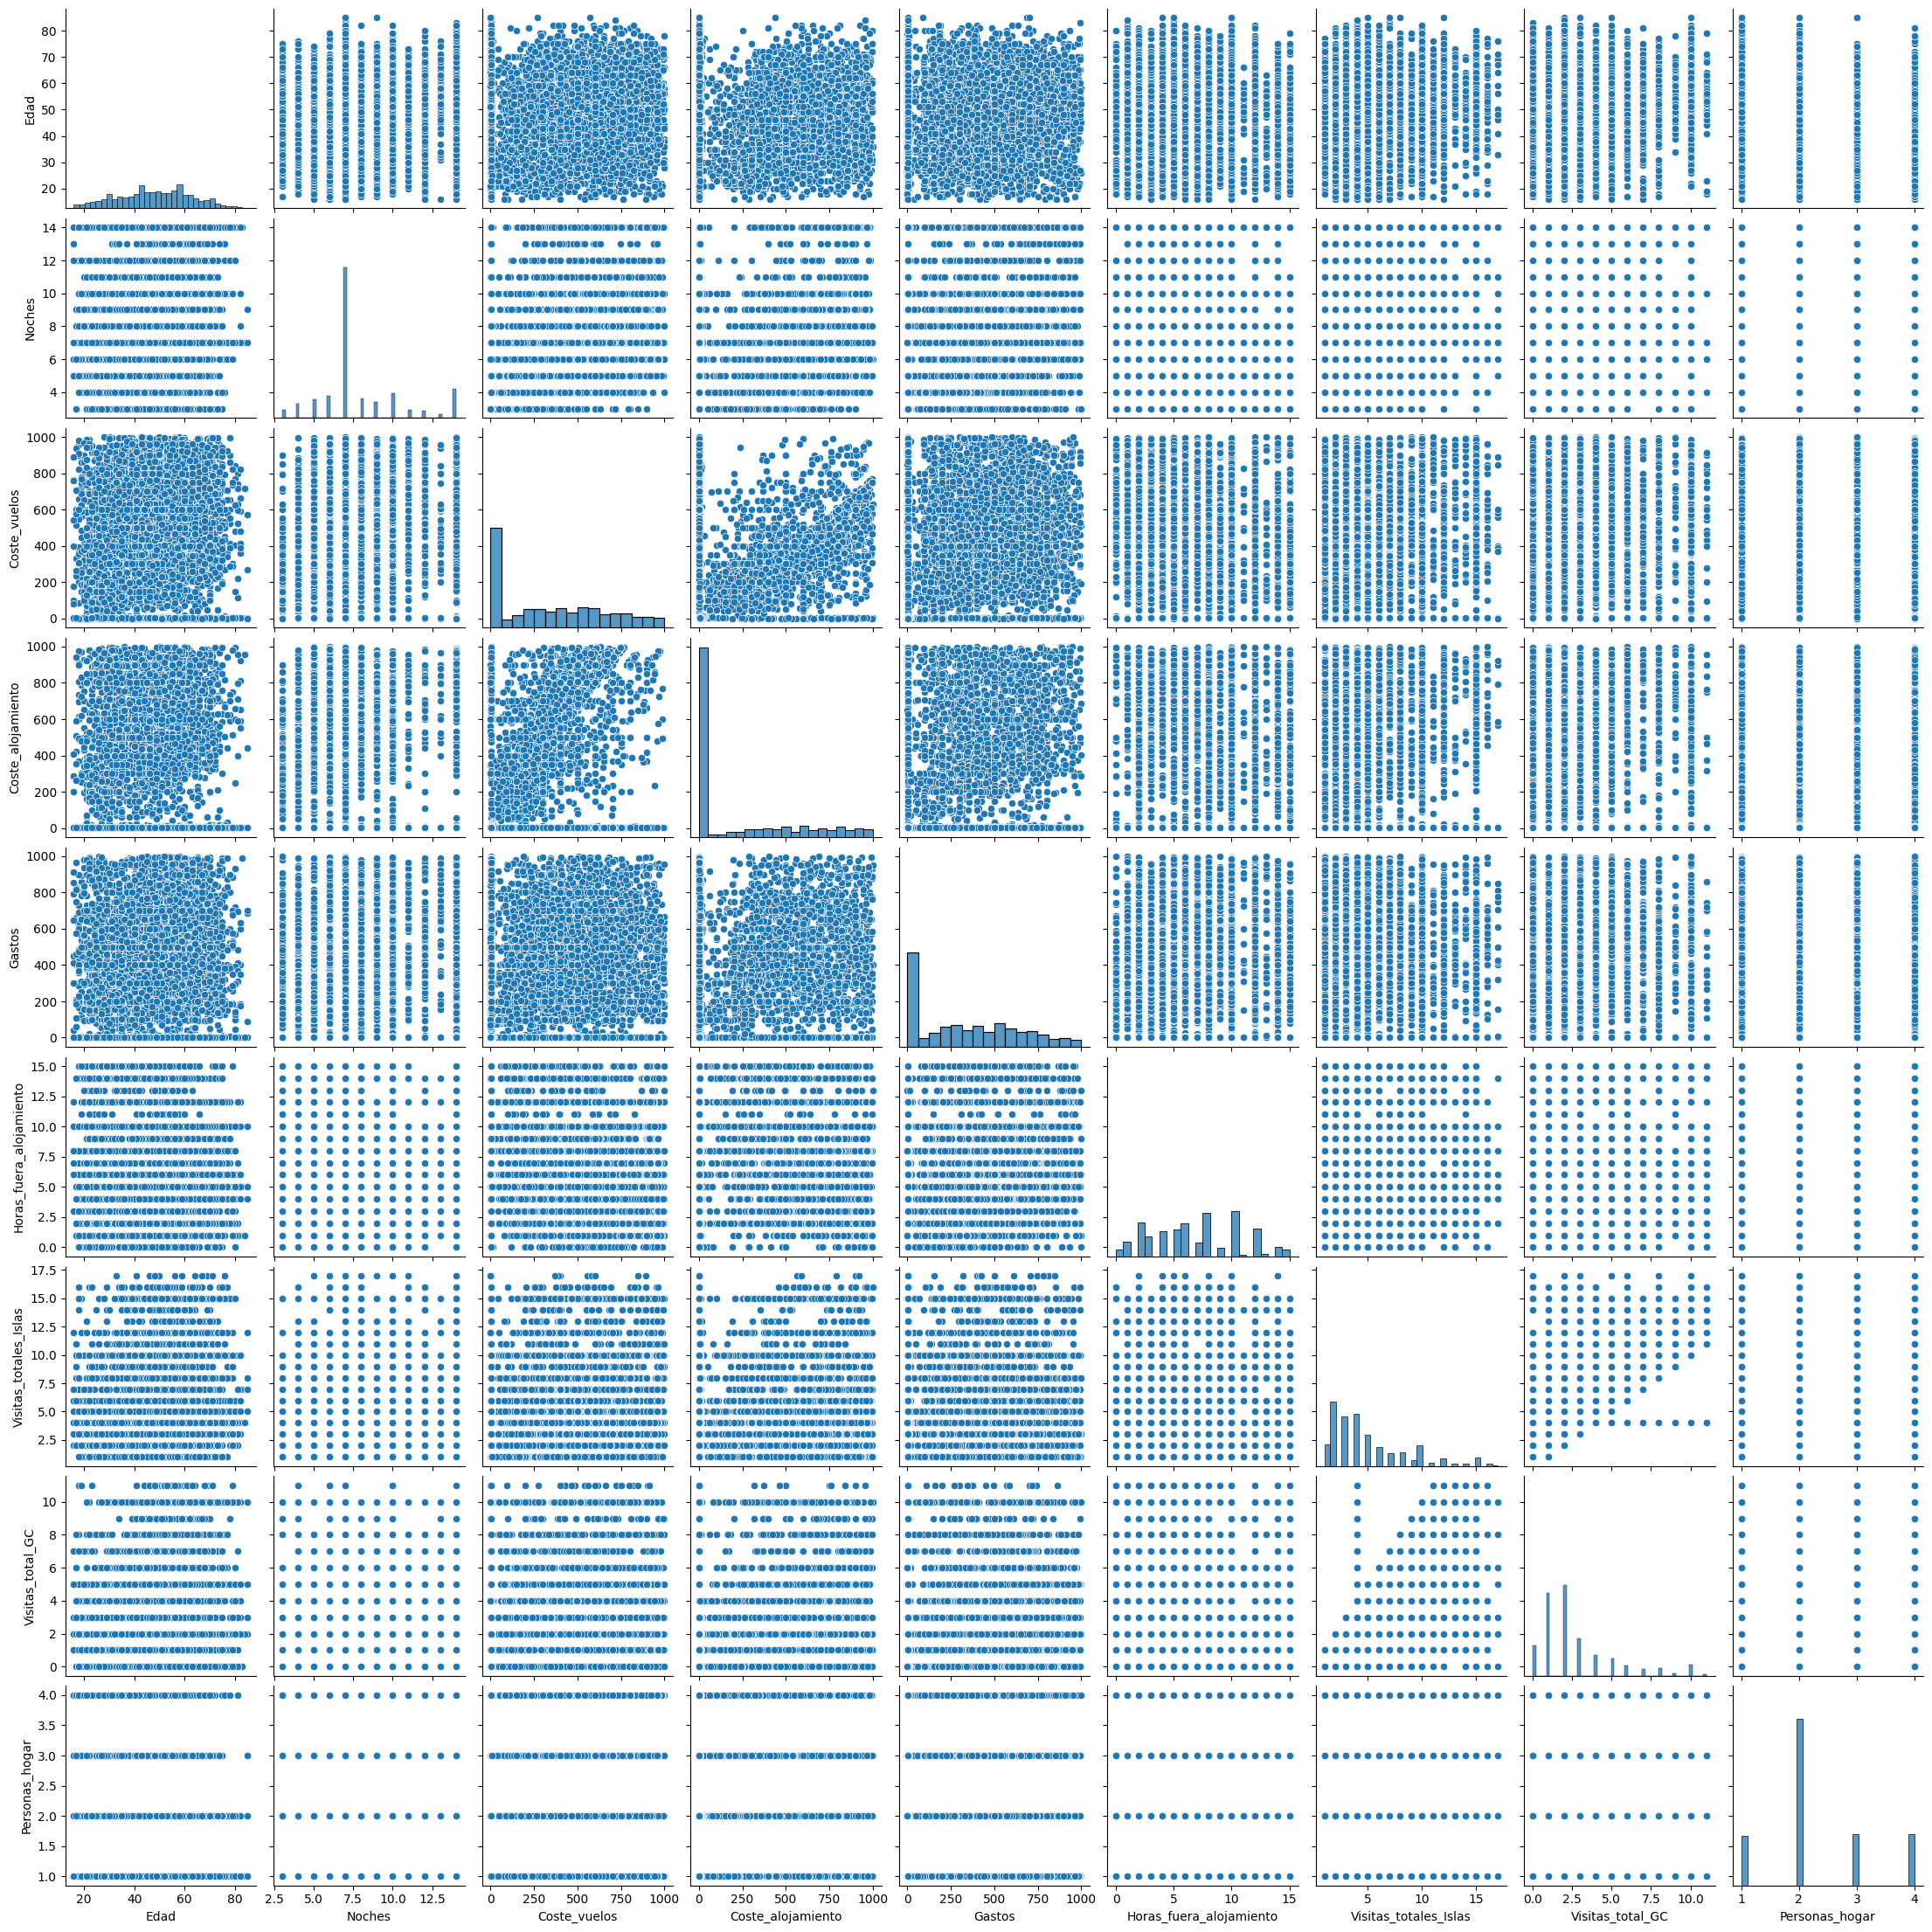

In [555]:
# Visualizar gráficos de dispersión para cada par de variables numéricas
sns.pairplot(df_2022[variables_numericas])
plt.show()

Un gráfico de dispersión es una representación visual que muestra la relación entre dos variables numéricas. Cada punto en el gráfico representa un par de valores, uno de cada variable, y ayuda a visualizar la relación (o la falta de ella) entre ellas. Es una herramienta poderosa para detectar patrones, tendencias y relaciones en los datos.

# Conclusiones:

- Se observa una fuerte correlación positiva entre el número total de visitas a las Islas Canarias y las visitas a Gran Canaria. Esto tiene sentido, ya que un mayor número de visitas a las Islas Canarias probablemente implique también visitas a Gran Canaria, dada su relevancia como uno de los destinos más populares del archipiélago.

- En los histogramas y los boxplots se observa que algunas variables contienen outliers, lo que sugiere la necesidad de estudiar más a fondo la relación entre la nacionalidad de los turistas y factores como el número de noches de estancia, el gasto realizado y las horas pasadas fuera del alojamiento. Además, es importante analizar el perfil sociodeográfico del turista para entender mejor cómo influye en la elección del tipo de alojamiento.

- En gráficos de disperción no se muestra relación fuerte entre ellas.

# **Análisis Multivariante**

Queremos evaluar cómo influyen múltiples variables

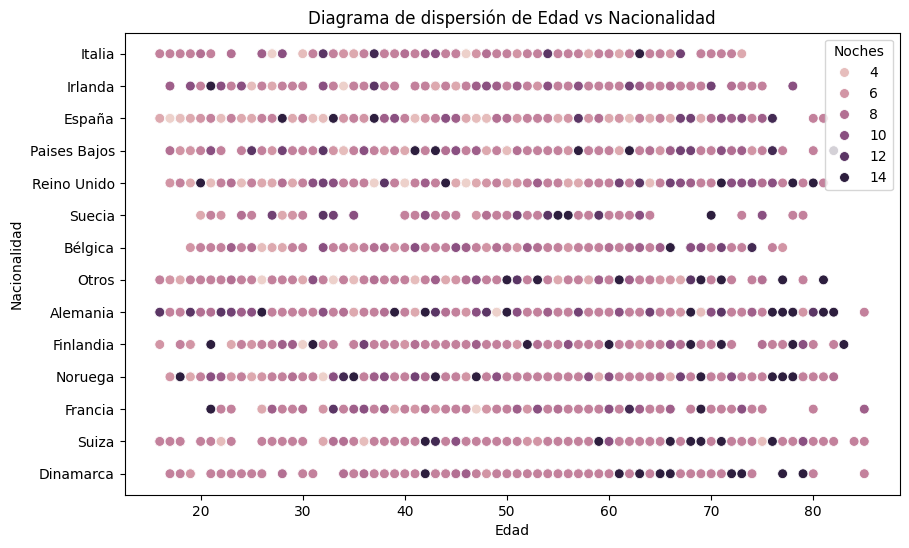

In [478]:
funciones.plot_scatter(df_2022, vari.Edad, vari.Nacionalidad, vari.Noches)

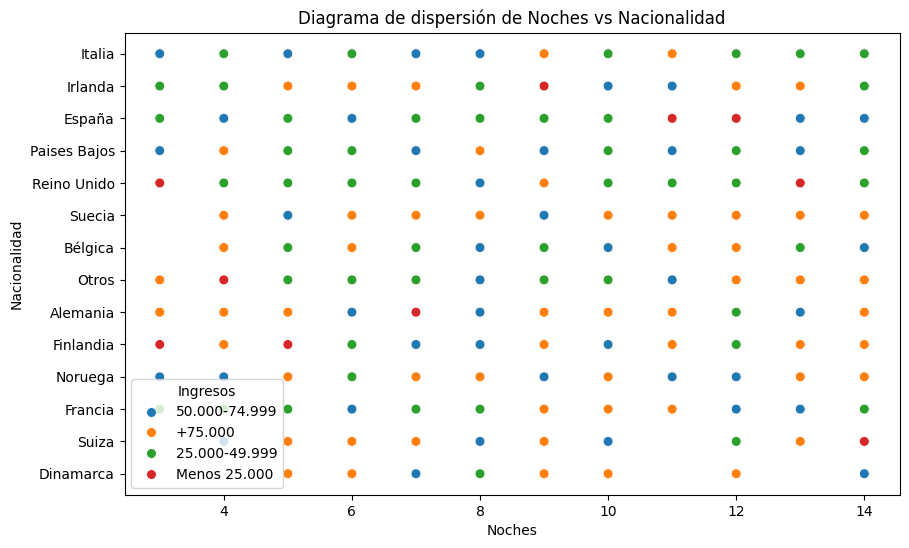

In [479]:
funciones.plot_scatter(df_2022, vari.Noches, vari.Nacionalidad, vari.Ingresos)